## Matrix Profile
    https://github.com/target/matrixprofile-ts
    https://github.com/matrix-profile-foundation/article-matrix-profile-intro/blob/master/Matrix%20Profile%20Example.ipynb
    https://www.cs.ucr.edu/~eamonn/MatrixProfile.html
    https://github.com/zpzim/SCAMP

# Package import

In [10]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import matplotlib.patches as mpatches
import seaborn as sns                            # more plots
sns.set()

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

from matrixprofile.discords import discords
from matrixprofile.matrixProfile import stomp
from matrixprofile.motifs import motifs

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#  Data metrics exploration & choosing any metric for AD. 

# Train & Test data exploration.

# Default data exploration. with multiple field. but using single field at a time.

   load_1min  process_summary_total  cpu_user_pct  memory_actual_used_pct
0      0.020                    141        0.0341                  0.0848
1      0.020                    141        0.0341                  0.0848
2      0.020                    141        0.0341                  0.0848
3      0.015                    141        0.0341                  0.0848
4      0.020                    141        0.0341                  0.0848
20000
0.1825 0.0
AxesSubplot(0.125,0.125;0.775x0.755)


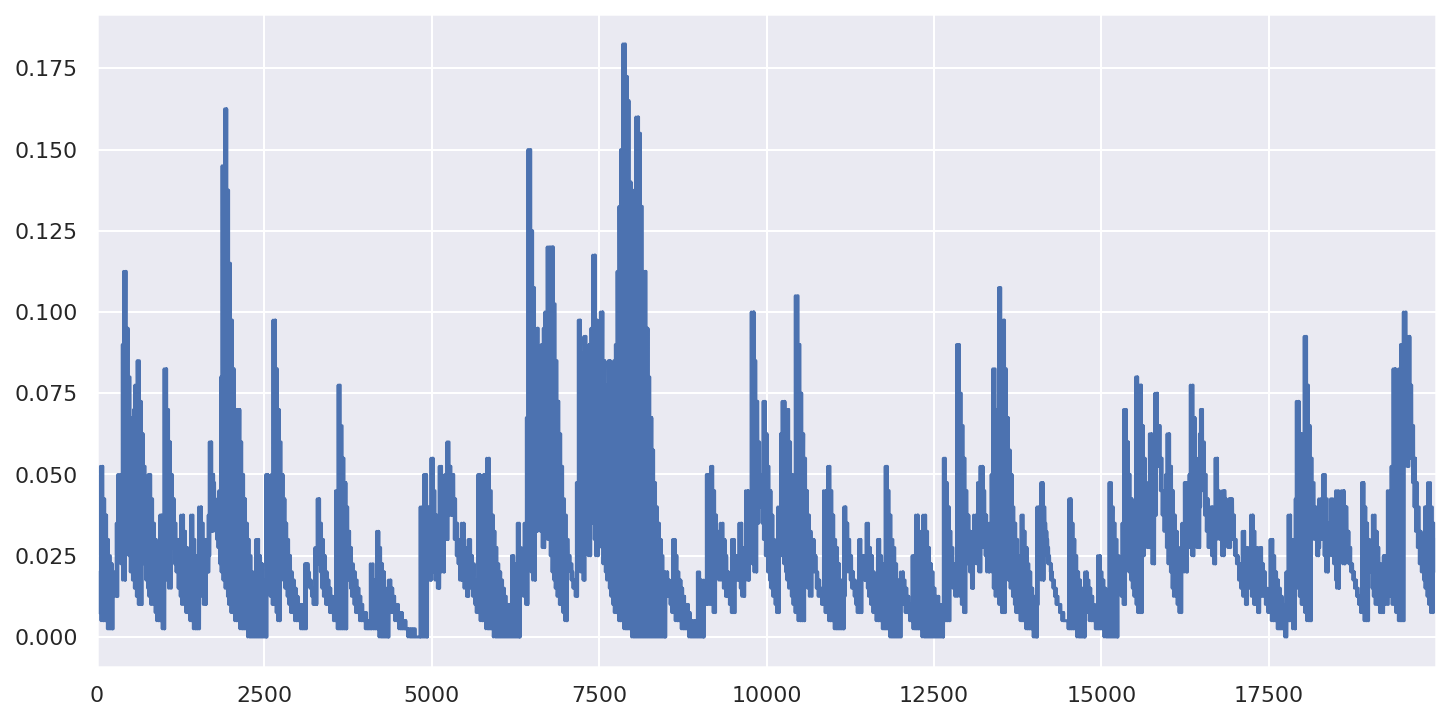

In [69]:
df1 = pd.read_csv('data/input.csv',skiprows=[1,2])
print(df1.head())
print(len(df1))
print(df1.load_1min.max(),df1.load_1min.min())
print(df1.load_1min.plot(figsize=(12,6)))

In [70]:
mp = pd.read_csv('./test2/mp_columns_out')
mpi = pd.read_csv('./test2/mp_columns_out_index')
print(mp[:5])
print(mpi[:5])

window_size = 1000
df1['1k-w Profile'] = np.append(mp, np.zeros(window_size) + np.nan)
df1['1k-w Profile Index'] = np.append(mpi, np.zeros(window_size) + np.nan)

   19.58239458
0    19.599277
1    19.588798
2    19.578300
3    19.572442
4    19.777826
   1473
0  1474
1  1475
2  1476
3  1477
4  1478


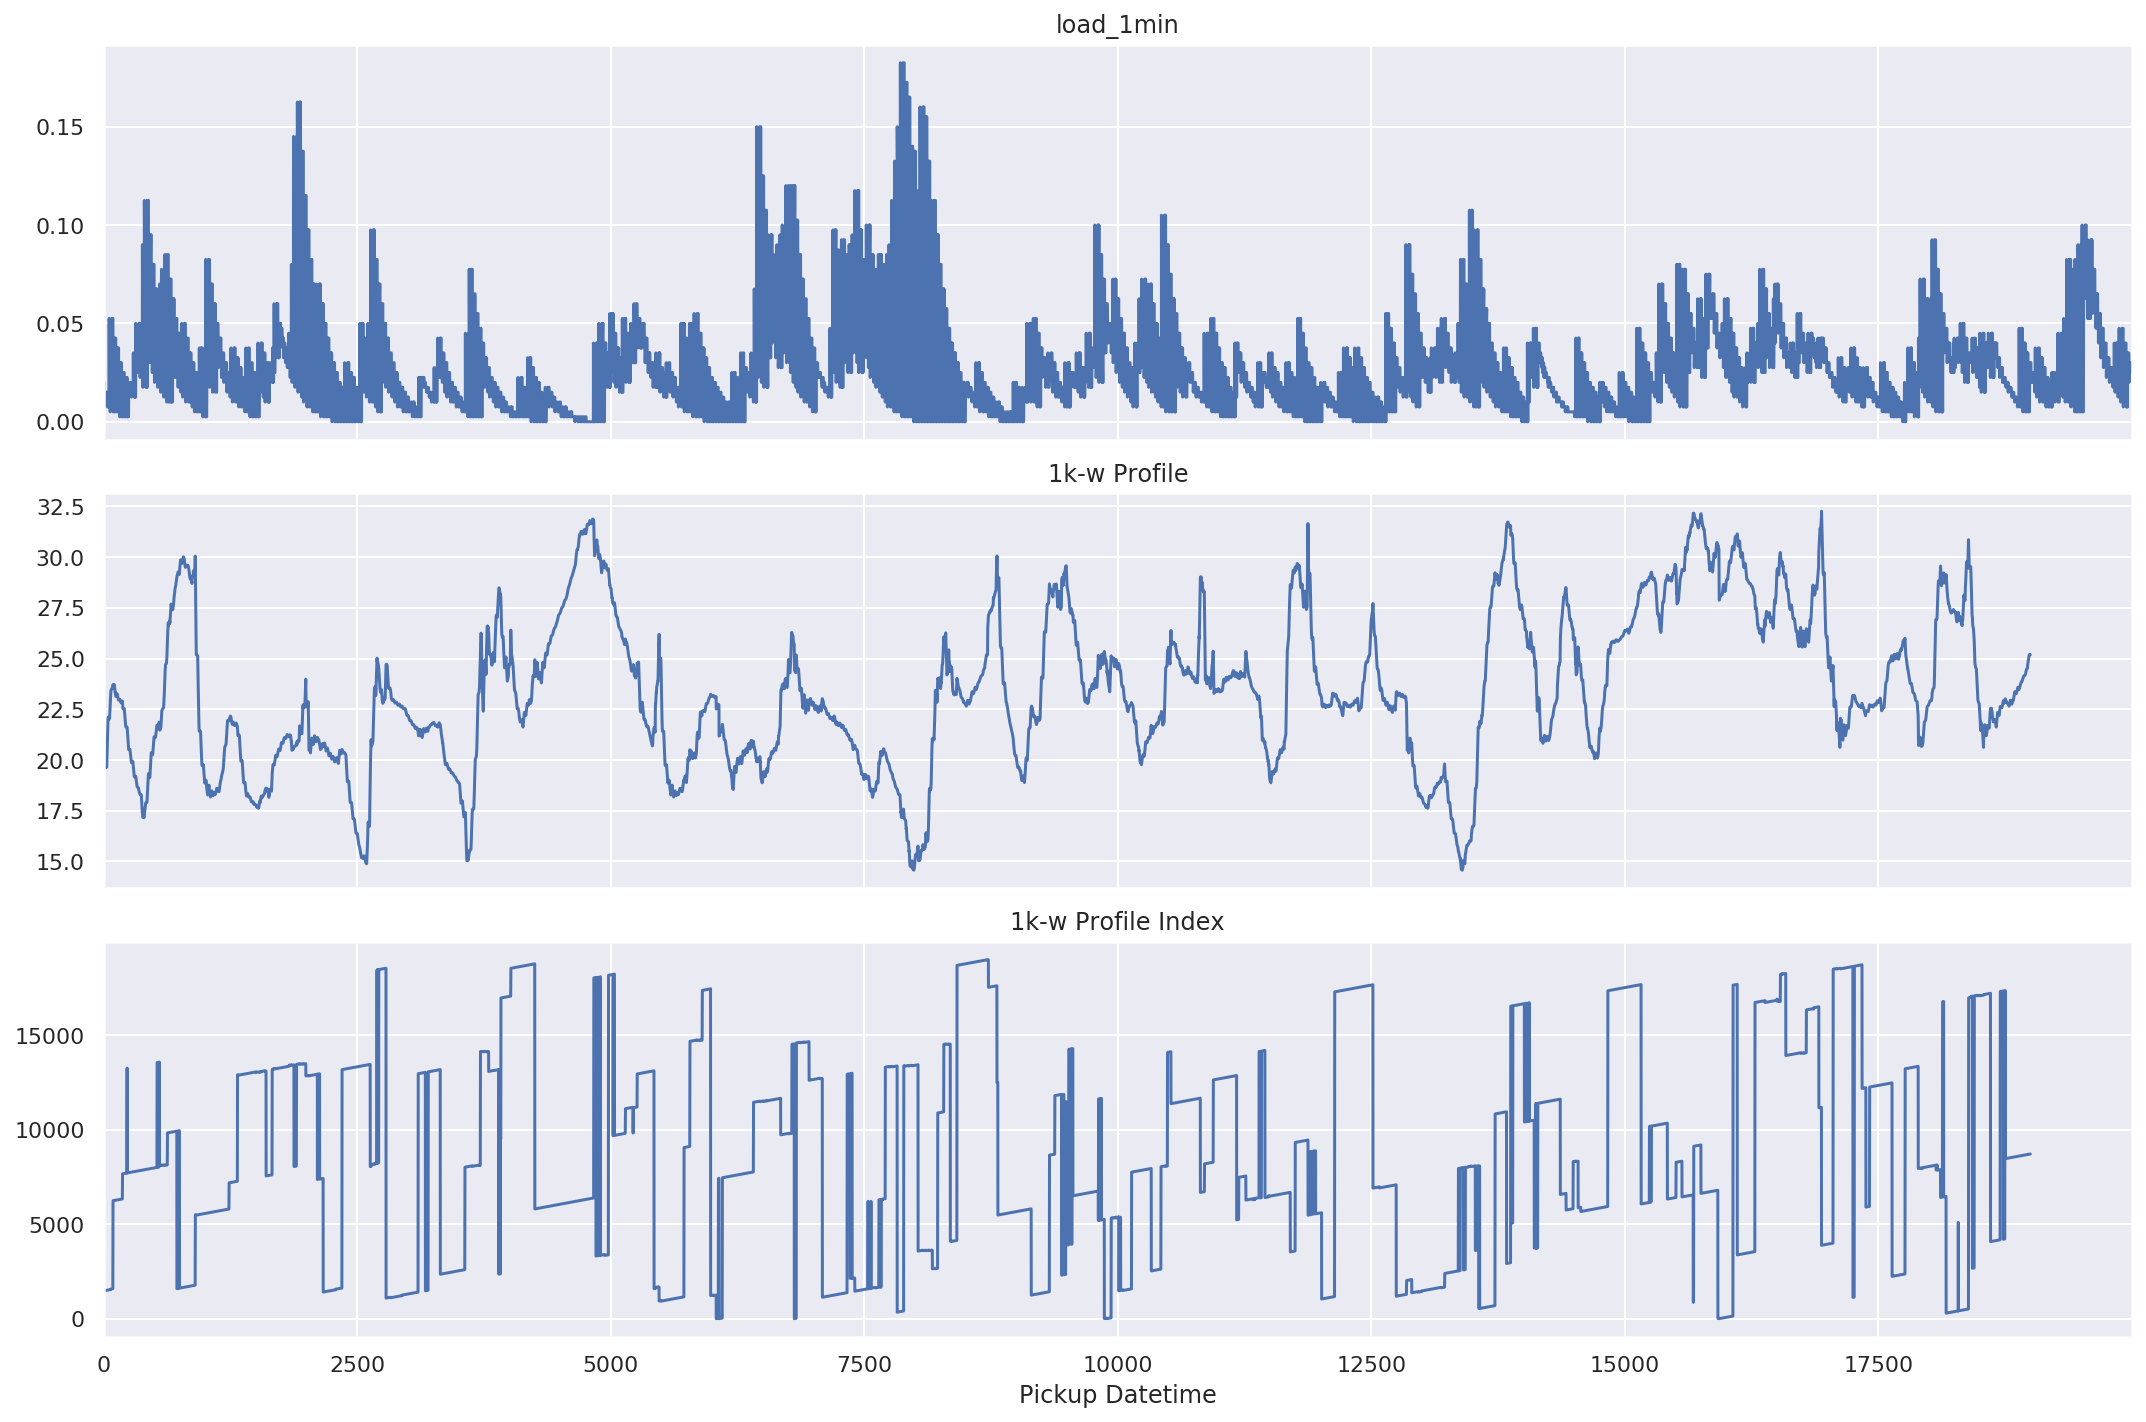

In [71]:
#Plot the signal data
fig, axes = plt.subplots(3,1,sharex=True,figsize=(15,10))

#df['4 Hours Profile'].plot(ax=axes[0], title='4 Hour Matrix Profile')
#df['8 Hours Profile'].plot(ax=axes[1], title='8 Hour Matrix Profile')
#df['12 Hours Profile'].plot(ax=axes[2], title='12 Hour Matrix Profile')
#df['24 Hours Profile'].plot(ax=axes[3], title='24 Hour Matrix Profile')
#df['7 Days Profile'].plot(ax=axes[4], title='7 Day Matrix Profile')
df1['load_1min'].plot(ax=axes[0], title='load_1min')
df1['1k-w Profile'].plot(ax=axes[1], title='1k-w Profile')
df1['1k-w Profile Index'].plot(ax=axes[2], title='1k-w Profile Index')
plt.xlabel('Pickup Datetime')
plt.tight_layout()
plt.show()

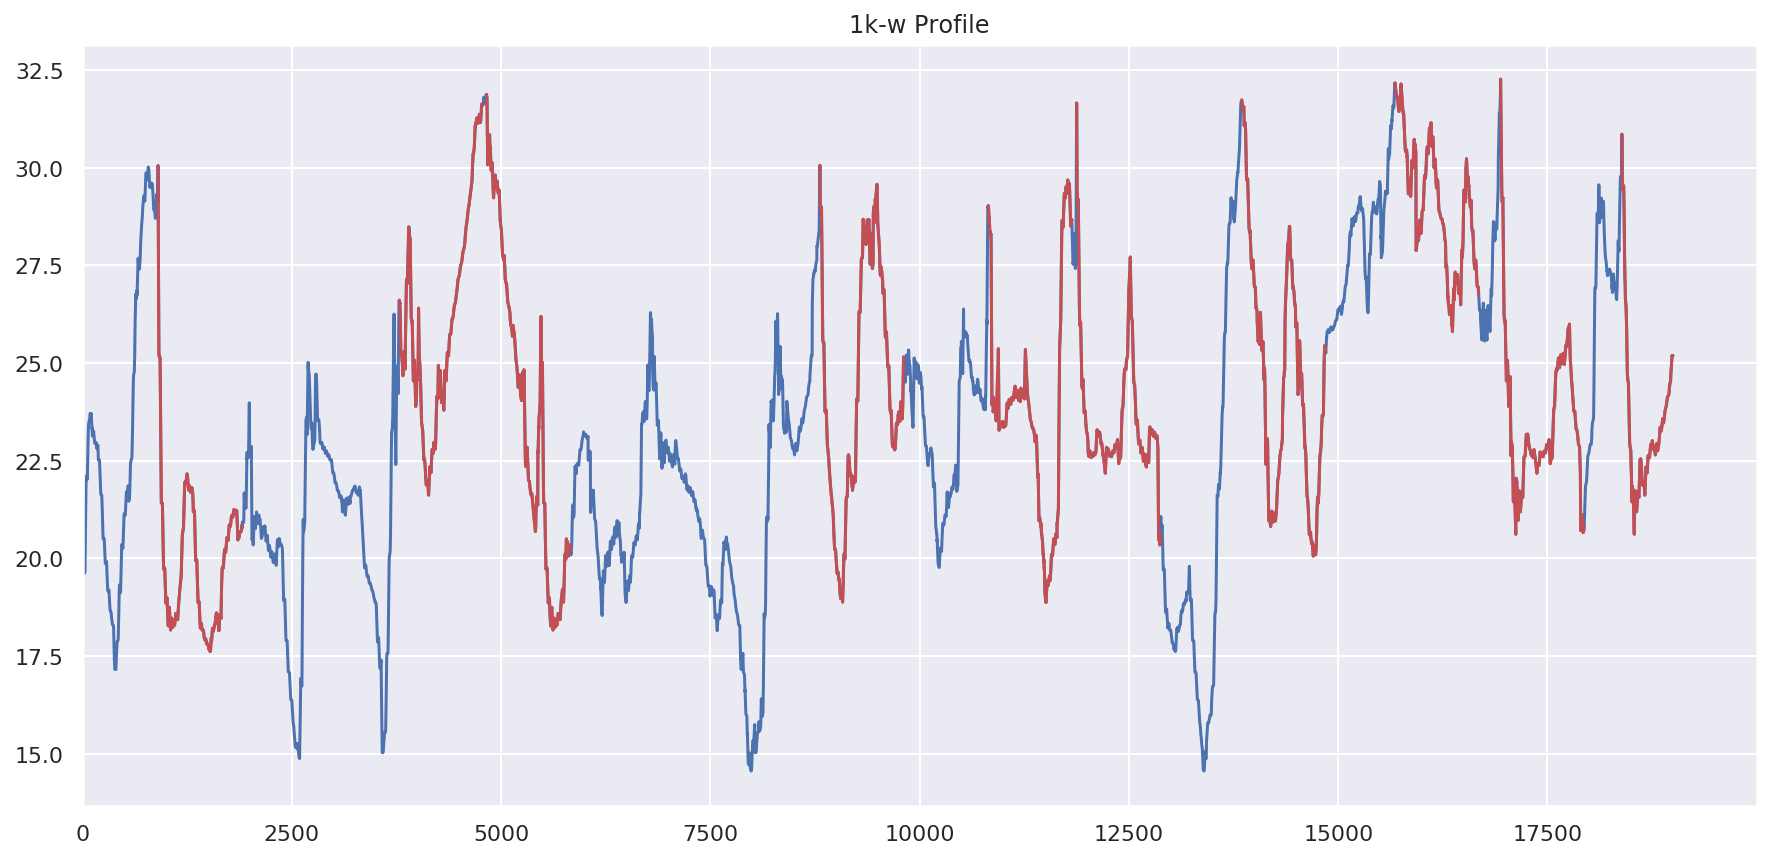

In [77]:
top_discords = discords(mp, window_size, k=10)
ax = df1.plot(kind='line', y='1k-w Profile', figsize=(15, 7), title='1k-w Profile', legend=None)

for start_index in top_discords:
    df1.iloc[start_index:start_index+window_size]['1k-w Profile'].plot(kind='line', c='r')
    
plt.show()

In [78]:
non_anom = df1[~df1.index.isin(top_discords)]['load_1min']
anom = df1[df1.index.isin(top_discords)]['load_1min']

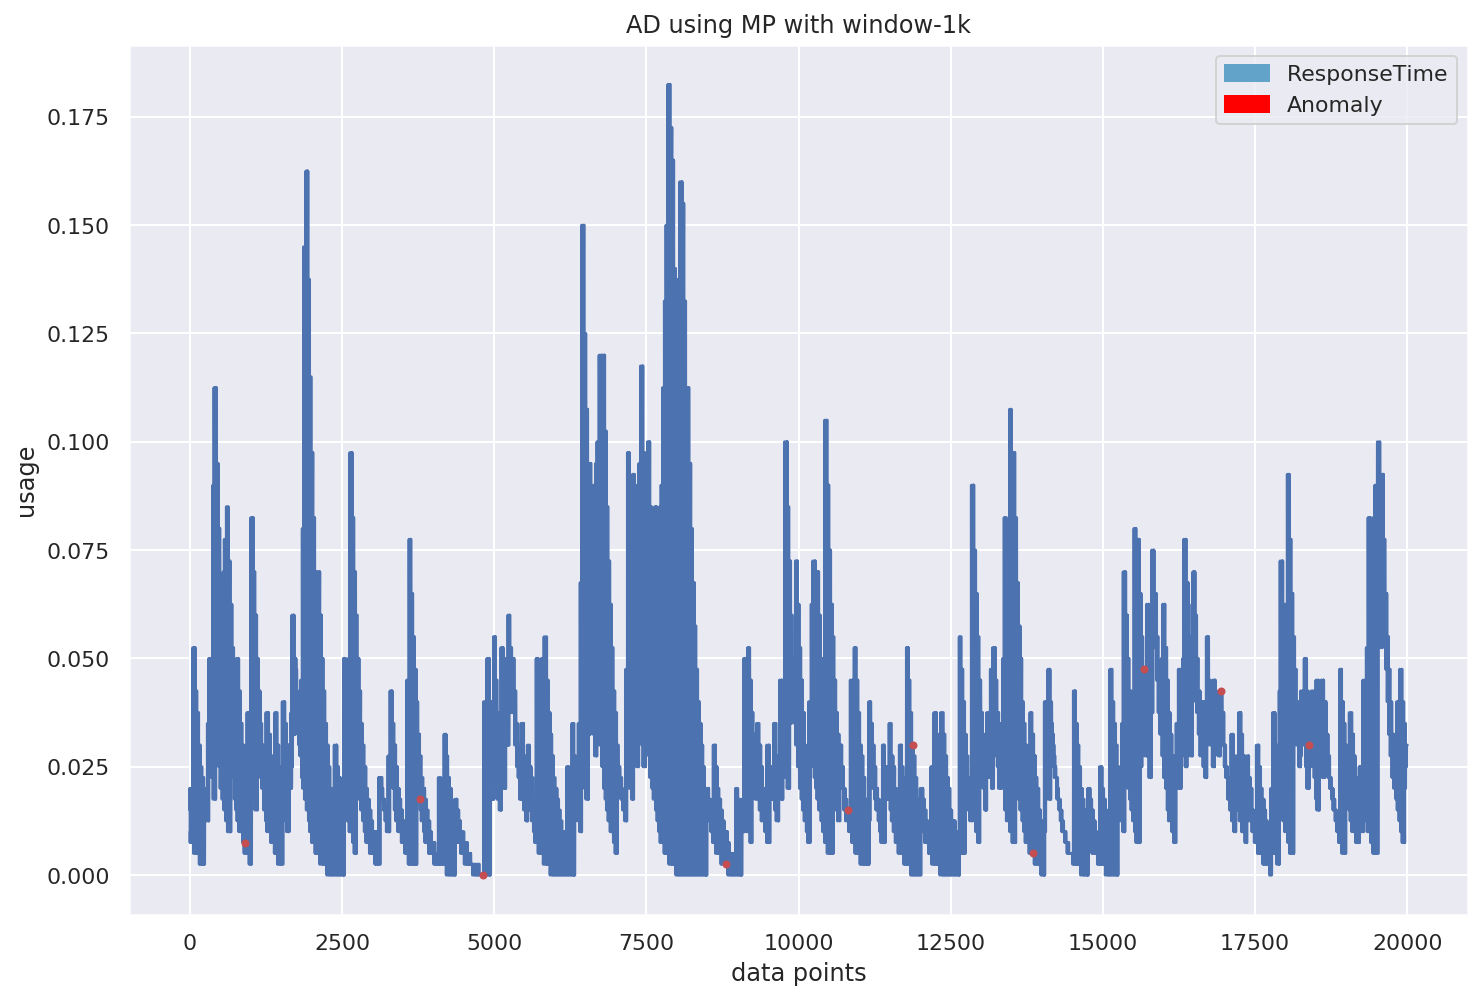

In [81]:
plt.figure(figsize = (12,8))
plt.plot(non_anom, linestyle = '-', label ='ResponseTime')
plt.plot(anom, 'ro', markersize = "3", label ='Anomaly')

red_patch = mpatches.Patch(color='red', label='Anomaly')
blue_lines = mpatches.Patch(color='#62A3C9', label='ResponseTime')

plt.legend(handles=[blue_lines, red_patch])
plt.ylabel('usage')
plt.xlabel('data points')
plt.title('AD using MP with window-1k')
plt.show()

In [82]:
non_anom = []
anom = []
for start_index in top_discords:
    anom.append(df1.iloc[start_index:start_index+window_size]['load_1min'])
anom_df = pd.concat(anom)
print(anom_df.head())
non_anom = df1[~df1.index.isin(anom_df.index)]['load_1min']
anom = df1[df1.index.isin(anom_df.index)]['load_1min']

16940    0.0425
16941    0.0425
16942    0.0425
16943    0.0425
16944    0.0425
Name: load_1min, dtype: float64


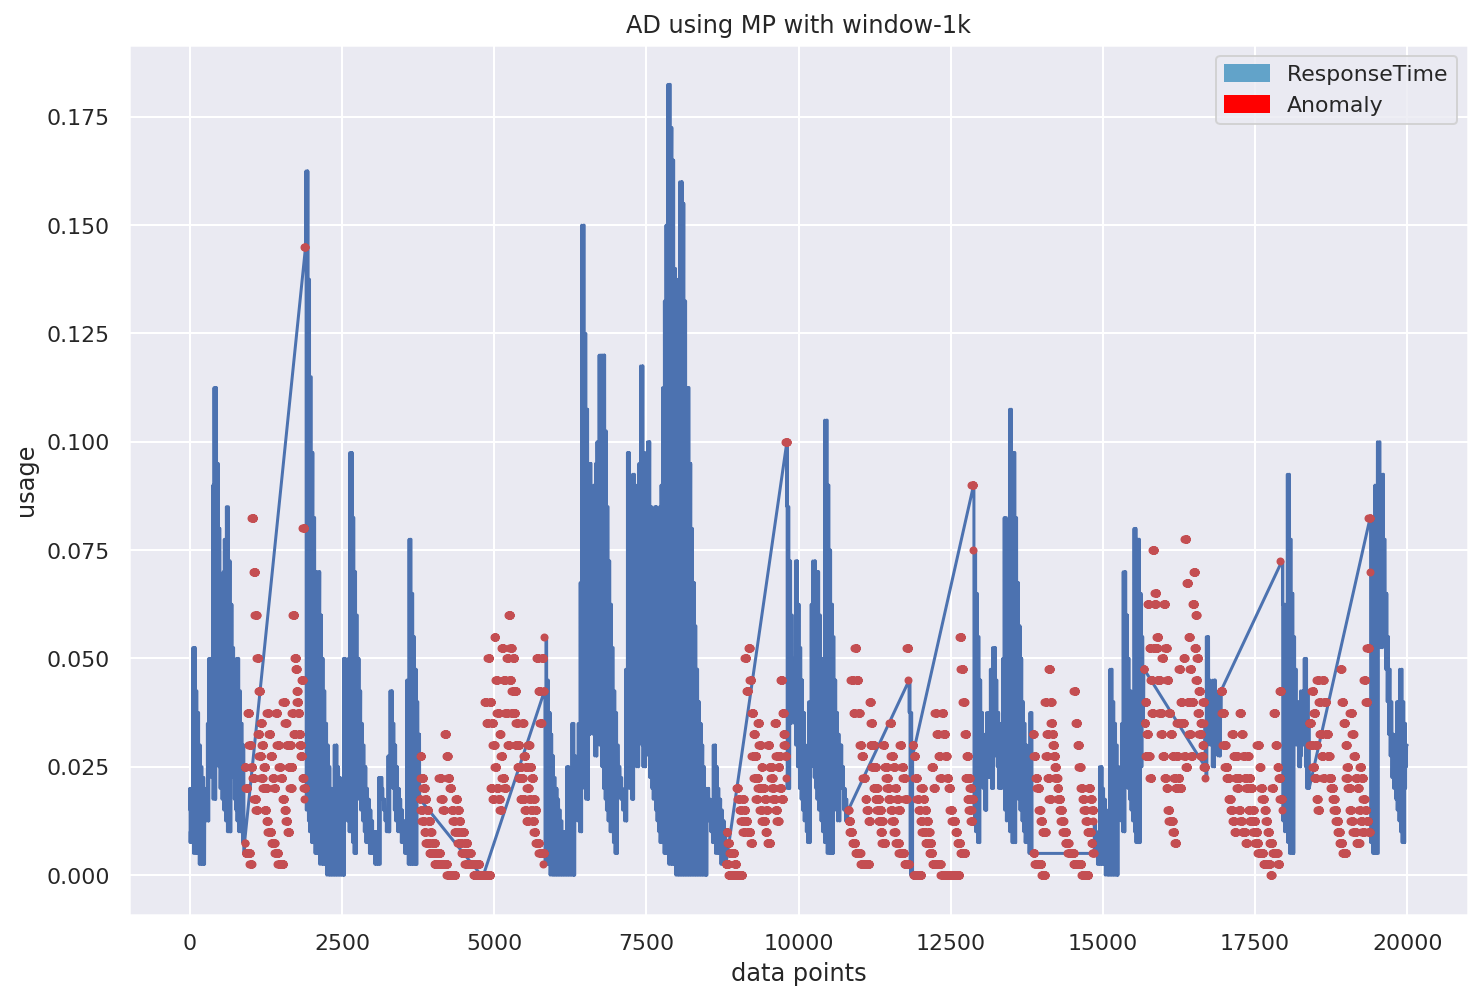

In [83]:
plt.figure(figsize = (12,8))
plt.plot(non_anom, linestyle = '-', label ='ResponseTime')
plt.plot(anom, 'ro', markersize = "3", label ='Anomaly')

red_patch = mpatches.Patch(color='red', label='Anomaly')
blue_lines = mpatches.Patch(color='#62A3C9', label='ResponseTime')

plt.legend(handles=[blue_lines, red_patch])
plt.ylabel('usage')
plt.xlabel('data points')
plt.title('AD using MP with window-1k')
plt.show()

   load_1min  process_summary_total  cpu_user_pct  memory_actual_used_pct  \
0        141                 0.0200        0.0341                  0.0848   
1        141                 0.0150        0.0341                  0.0848   
2        141                 0.0200        0.0341                  0.0848   
3        141                 0.0200        0.0341                  0.0848   
4        194                 0.0075        0.0501                  0.6486   

   prediction  anomaly_score  anomaly_likelihood  
0      0.0200            1.0                 0.5  
1      0.0200            0.0                 0.5  
2      0.0185            0.0                 0.5  
3      0.0200            0.0                 0.5  
4      0.0200            0.0                 0.5  
19998
0.1825 0.0
AxesSubplot(0.125,0.125;0.775x0.755)


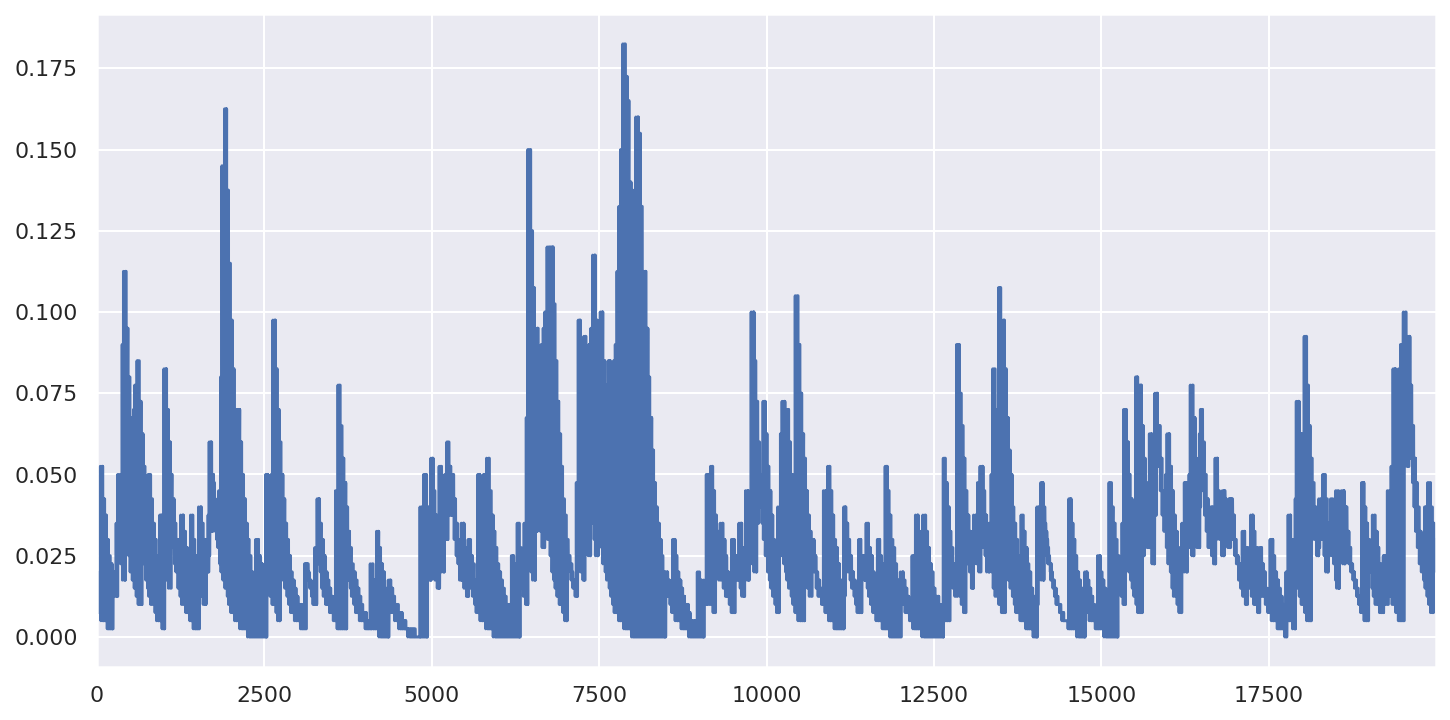

In [66]:
df = pd.read_csv('data/output.csv',skiprows=[1,2])
print(df.head())
print(len(df))
# here column order got misplaced. by looking at data, process_summary_total looks hold load_1min field's data.
# so using process_summary_total fields data.
print(df.process_summary_total.max(),df.process_summary_total.min())
print(df.process_summary_total.plot(figsize=(12,6)))

In [67]:
non_anom = df[df['anomaly_likelihood']<=0.99999]['process_summary_total']
anom = df[df['anomaly_likelihood']>0.99999]['process_summary_total']

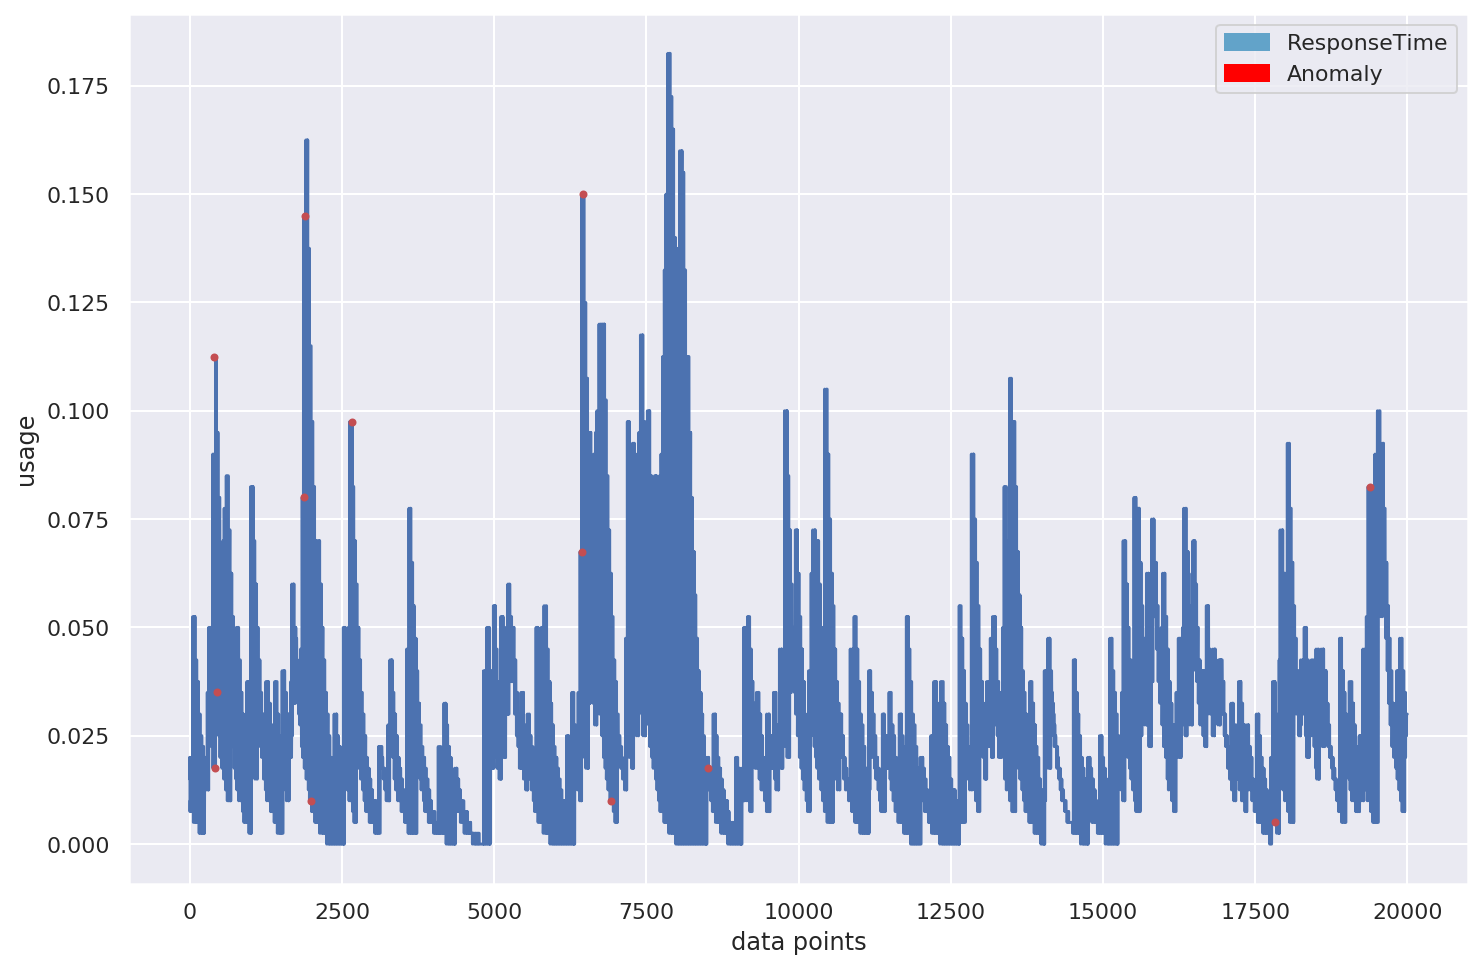

In [68]:
plt.figure(figsize = (12,8))
plt.plot(non_anom, linestyle = '-', label ='ResponseTime')
plt.plot(anom, 'ro', markersize = "3", label ='Anomaly')

red_patch = mpatches.Patch(color='red', label='Anomaly')
blue_lines = mpatches.Patch(color='#62A3C9', label='ResponseTime')

plt.legend(handles=[blue_lines, red_patch])
plt.ylabel('usage')
plt.xlabel('data points')
plt.show()

# Default data exploration with single field.

                timestamp_new  load_1min
0  2019-02-04 21:34:35.551000     0.0100
1  2019-02-04 21:34:35.554000     0.0125
2  2019-02-04 21:34:35.555000     0.0125
3  2019-02-04 21:34:35.556000     0.0125
4  2019-02-04 21:34:35.551000     0.0125
5711703
0.7925 0.0
AxesSubplot(0.125,0.125;0.775x0.755)


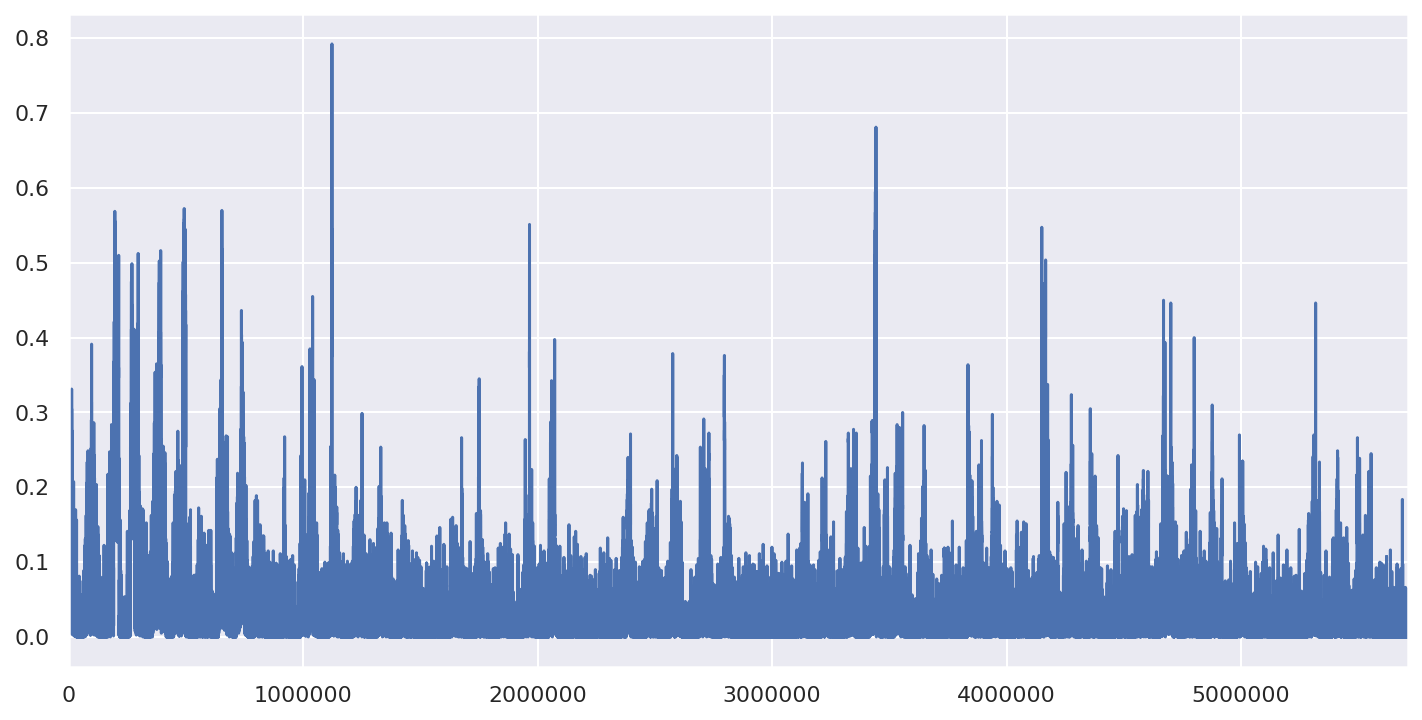

In [84]:
df1 = pd.read_csv('data/load_1min_train_try.csv',skiprows=[1,2])
print(df1.head())
print(len(df1))
print(df1.load_1min.max(),df1.load_1min.min())
print(df1.load_1min.plot(figsize=(12,6)))

In [ ]:
df1['load_1min'].to_csv('data/load_1min_train_try.txt',index=False)

In [12]:
df1 = pd.read_csv('data/load_1min_val_try.csv')
df1.columns

Index(['load_1min'], dtype='object')

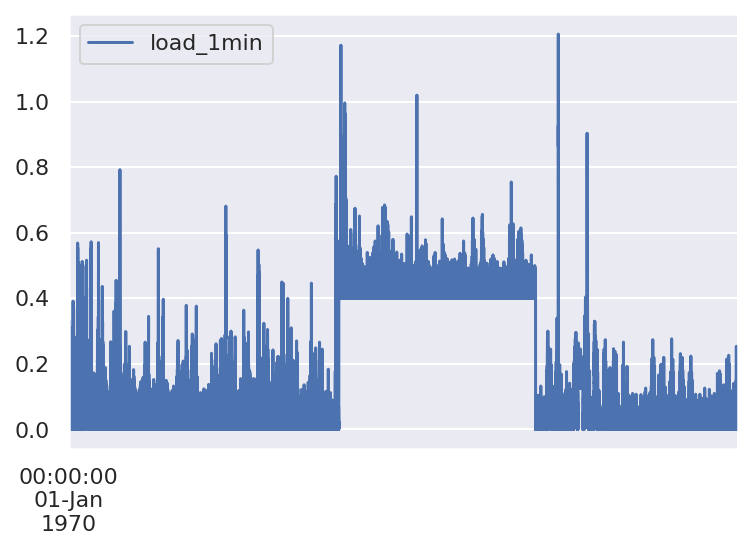

In [87]:
df1 = pd.read_csv('data/load_1min_val_try.csv')
df1.index= pd.to_datetime(df1.index)
df1.sort_index(ascending=True, inplace=True)
df1.head()
df1.plot()

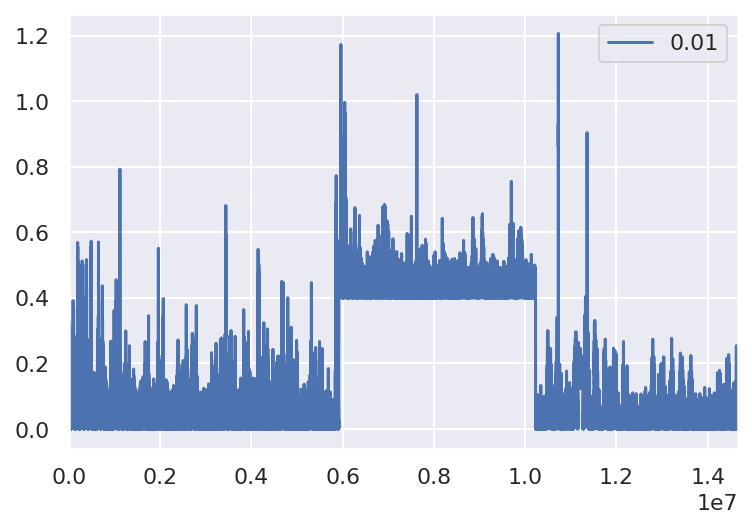

In [17]:
#df1['load_1min'].to_csv('data/load_1min_val_try.txt',index=False)
df3 = pd.read_csv('data/load_1min_val_try.txt')
df3.plot()

In [13]:
mp = pd.read_csv('./test3/mp_columns_out')
mpi = pd.read_csv('./test3/mp_columns_out_index')
print(mp[:5])
print(mpi[:5])

window_size = 1000
df1['1k-w Profile'] = np.append(mp, np.zeros(window_size) + np.nan)
df1['1k-w Profile Index'] = np.append(mpi, np.zeros(window_size) + np.nan)

   18.869395
0  18.886514
1  18.903858
2  18.921258
3  18.938711
4  18.952110
   9753164
0  9753165
1  9753166
2  9753167
3  9753168
4  9753169


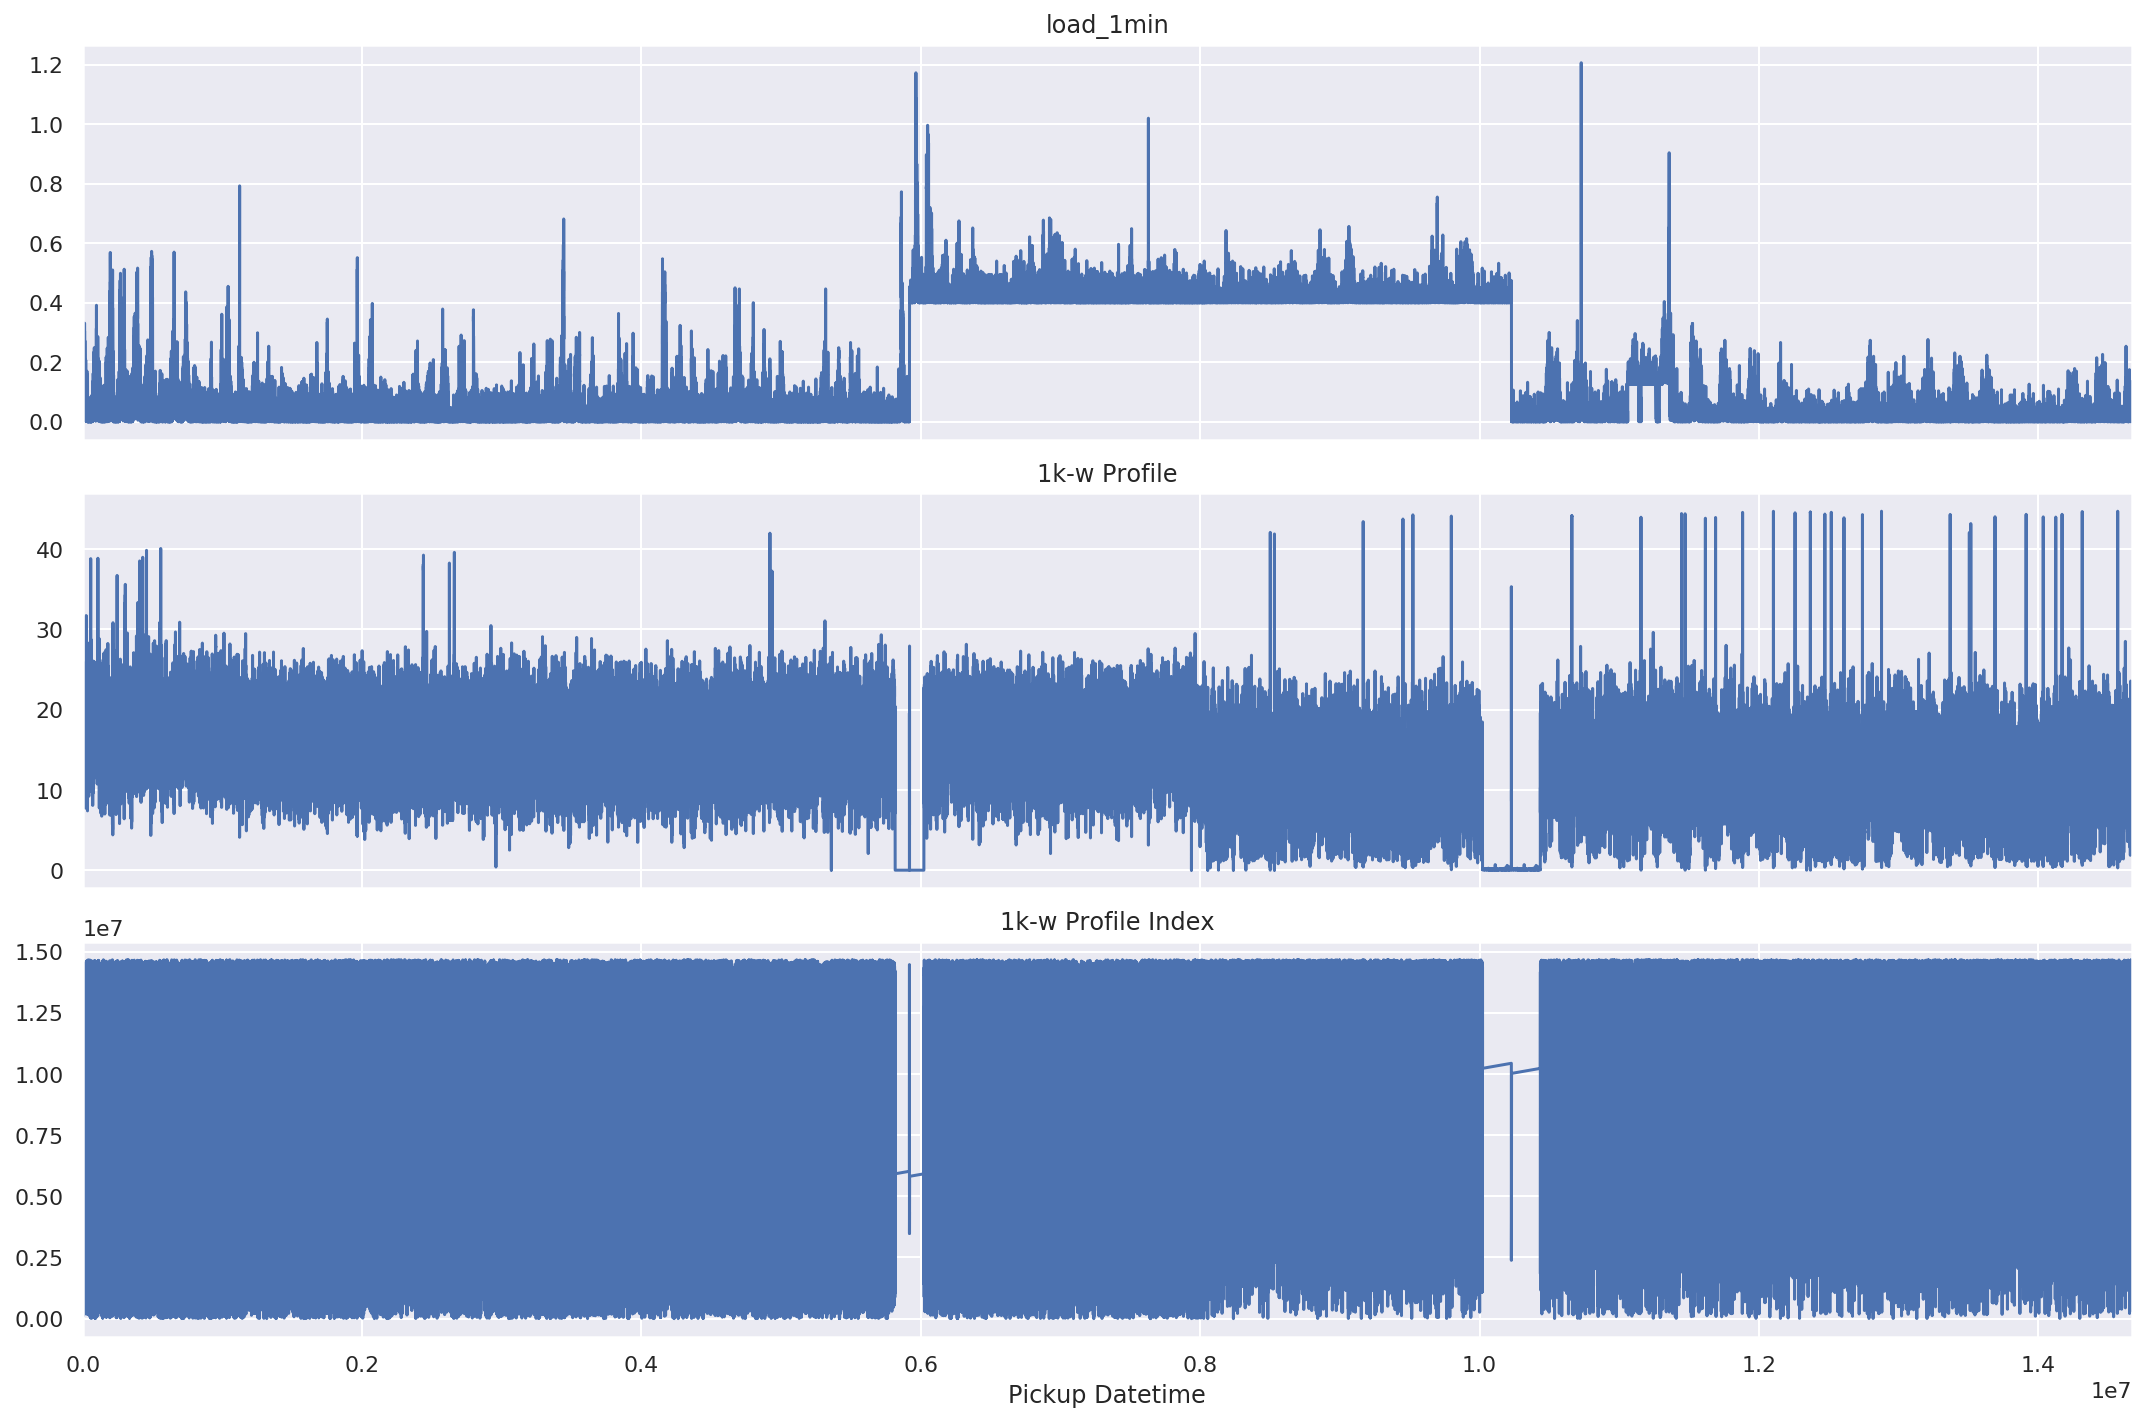

In [14]:
#Plot the signal data
fig, axes = plt.subplots(3,1,sharex=True,figsize=(15,10))

#df['4 Hours Profile'].plot(ax=axes[0], title='4 Hour Matrix Profile')
#df['8 Hours Profile'].plot(ax=axes[1], title='8 Hour Matrix Profile')
#df['12 Hours Profile'].plot(ax=axes[2], title='12 Hour Matrix Profile')
#df['24 Hours Profile'].plot(ax=axes[3], title='24 Hour Matrix Profile')
#df['7 Days Profile'].plot(ax=axes[4], title='7 Day Matrix Profile')
df1['load_1min'].plot(ax=axes[0], title='load_1min')
df1['1k-w Profile'].plot(ax=axes[1], title='1k-w Profile')
df1['1k-w Profile Index'].plot(ax=axes[2], title='1k-w Profile Index')
plt.xlabel('Pickup Datetime')
plt.tight_layout()
plt.show()

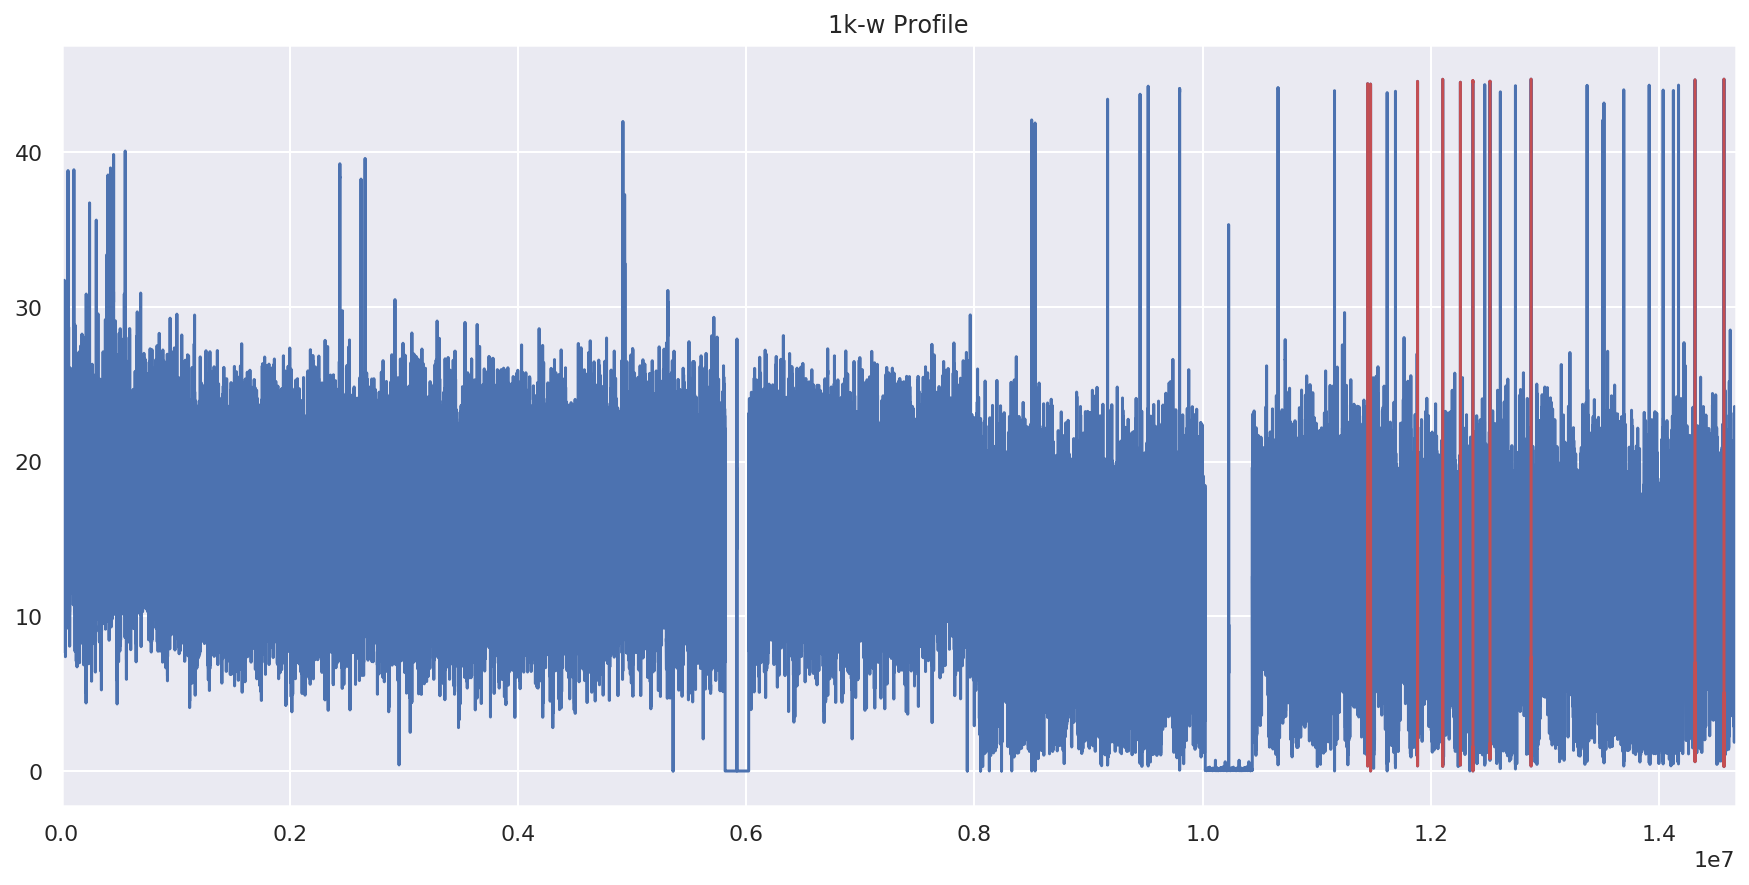

In [15]:
top_discords = discords(mp, window_size, k=10)
ax = df1.plot(kind='line', y='1k-w Profile', figsize=(15, 7), title='1k-w Profile', legend=None)

for start_index in top_discords:
    df1.iloc[start_index:start_index+window_size]['1k-w Profile'].plot(kind='line', c='r')
    
plt.show()

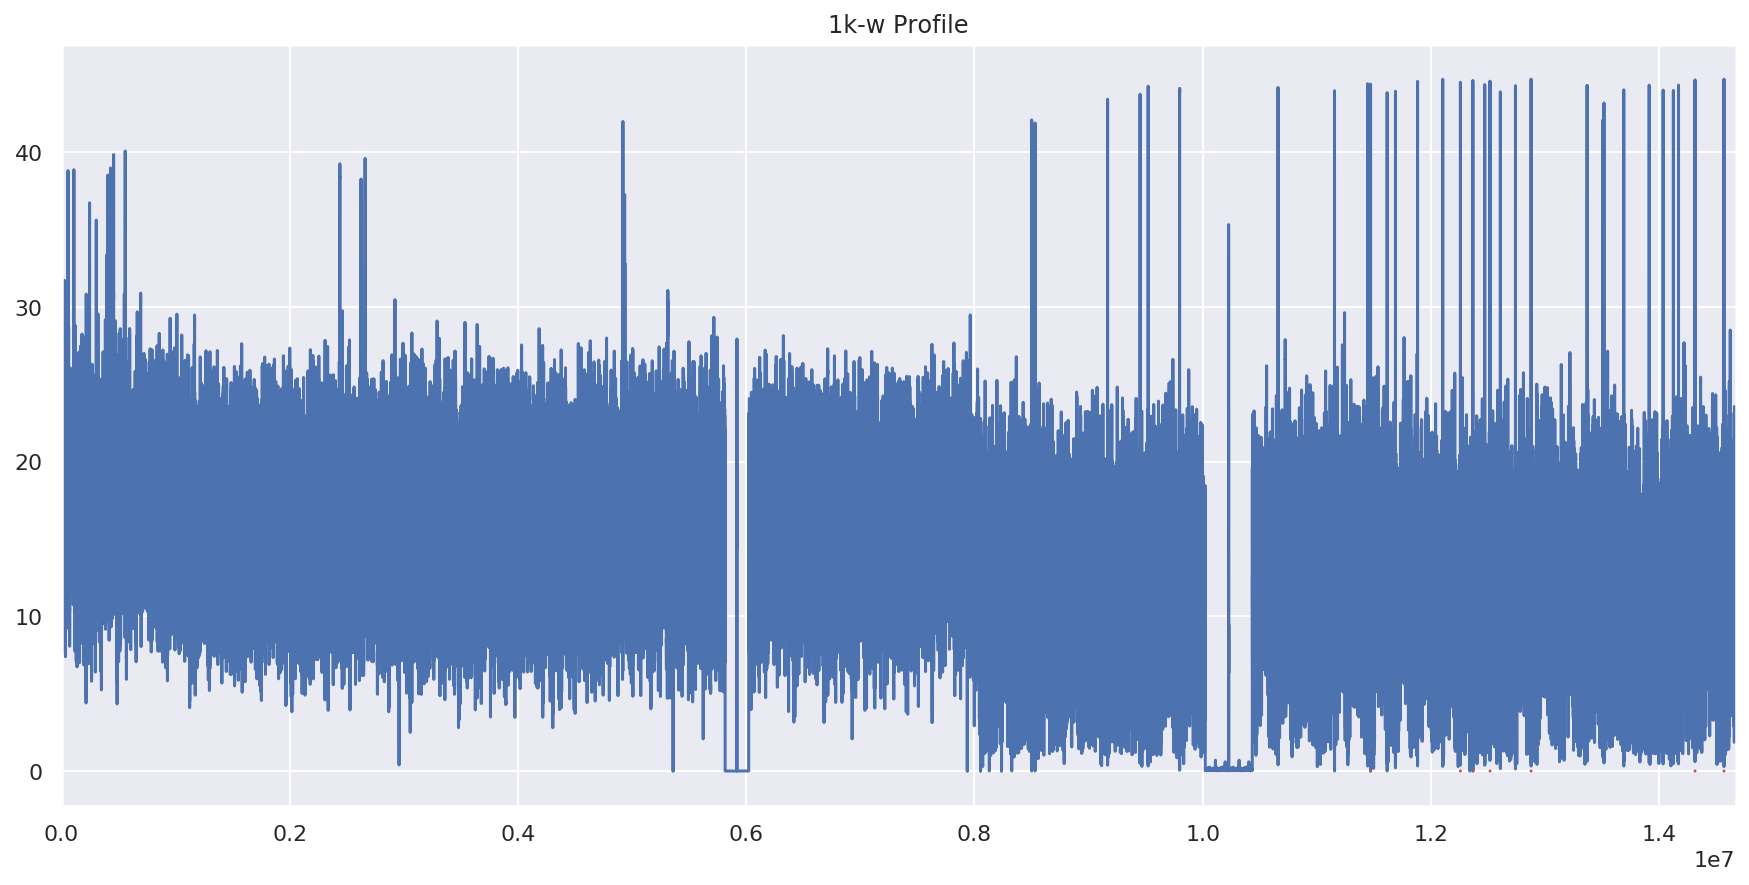

In [16]:
top_discords = discords(mp, window_size, k=10)
ax = df1.plot(kind='line', y='1k-w Profile', figsize=(15, 7), title='1k-w Profile', legend=None)

for start_index in top_discords:
    df1.iloc[start_index:start_index+window_size]['load_1min'].plot(kind='line', c='r')
    
plt.show()

In [18]:
non_anom = []
anom = []
for start_index in top_discords:
    anom.append(df1.iloc[start_index:start_index+window_size]['load_1min'])
anom_df = pd.concat(anom)
print(anom_df.head())
non_anom = df1[~df1.index.isin(anom_df.index)]['load_1min']
anom = df1[df1.index.isin(anom_df.index)]['load_1min']

14568506    0.0013
14568507    0.0000
14568508    0.0000
14568509    0.0000
14568510    0.0000
Name: load_1min, dtype: float64


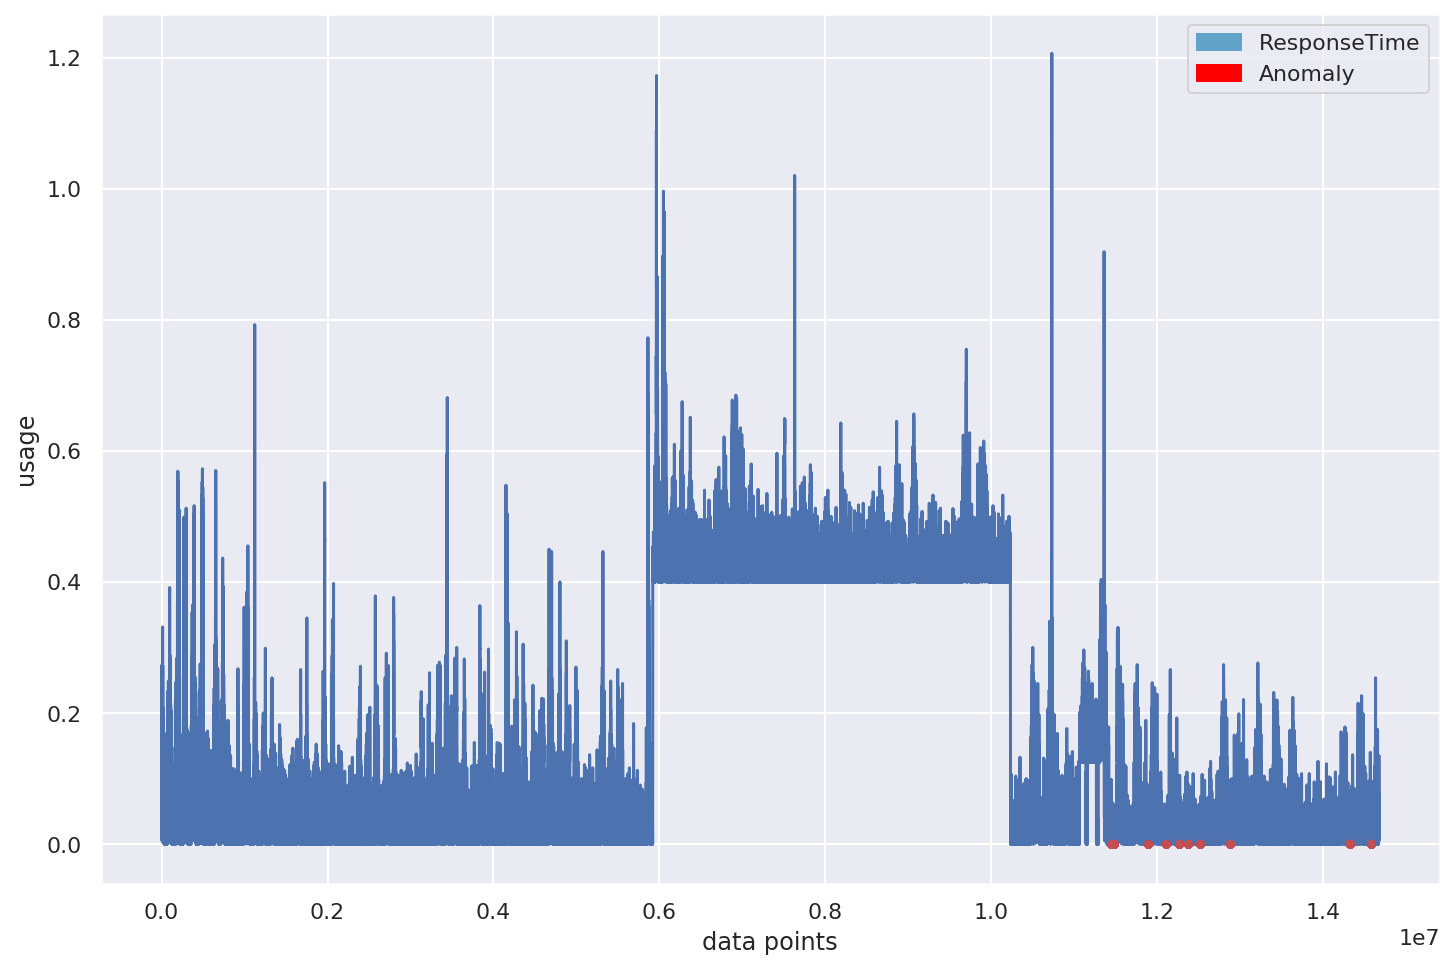

In [19]:
plt.figure(figsize = (12,8))
plt.plot(non_anom, linestyle = '-', label ='ResponseTime')
plt.plot(anom, 'ro', markersize = "3", label ='Anomaly')

red_patch = mpatches.Patch(color='red', label='Anomaly')
blue_lines = mpatches.Patch(color='#62A3C9', label='ResponseTime')

plt.legend(handles=[blue_lines, red_patch])
plt.ylabel('usage')
plt.xlabel('data points')
plt.show()

In [40]:
non_anom = df1[df1['anomaly_likelihood']<=0.99999]['actual_value']
anom = df1[df1['anomaly_likelihood']>0.99999]['actual_value']

In [41]:
#anom.head()
print(df1['anomaly_likelihood'].max(),df1['anomaly_likelihood'].min(),df1['anomaly_likelihood'].mean())
print(len(df1),len(non_anom),len(anom))

0.9999999990147977 0.5 0.7376055933590747
24998 24972 26


In [42]:
df1[df1['anomaly_likelihood']>0.99999].head()

actual_value  prediction  anomaly_score  \
2018-11-15 12:05:51        0.0250      0.0250            1.0   
2018-11-15 12:05:51        0.4250      0.4250            1.0   
2018-11-15 12:09:10        0.1425      0.1425            0.6   
2018-11-15 12:09:50        0.3625      0.3625            1.0   
2018-11-15 12:10:30        0.4450      0.4450            1.0   

                     anomaly_likelihood  
2018-11-15 12:05:51            0.999999  
2018-11-15 12:05:51            0.999999  
2018-11-15 12:09:10            0.999998  
2018-11-15 12:09:50            1.000000  
2018-11-15 12:10:30            1.000000

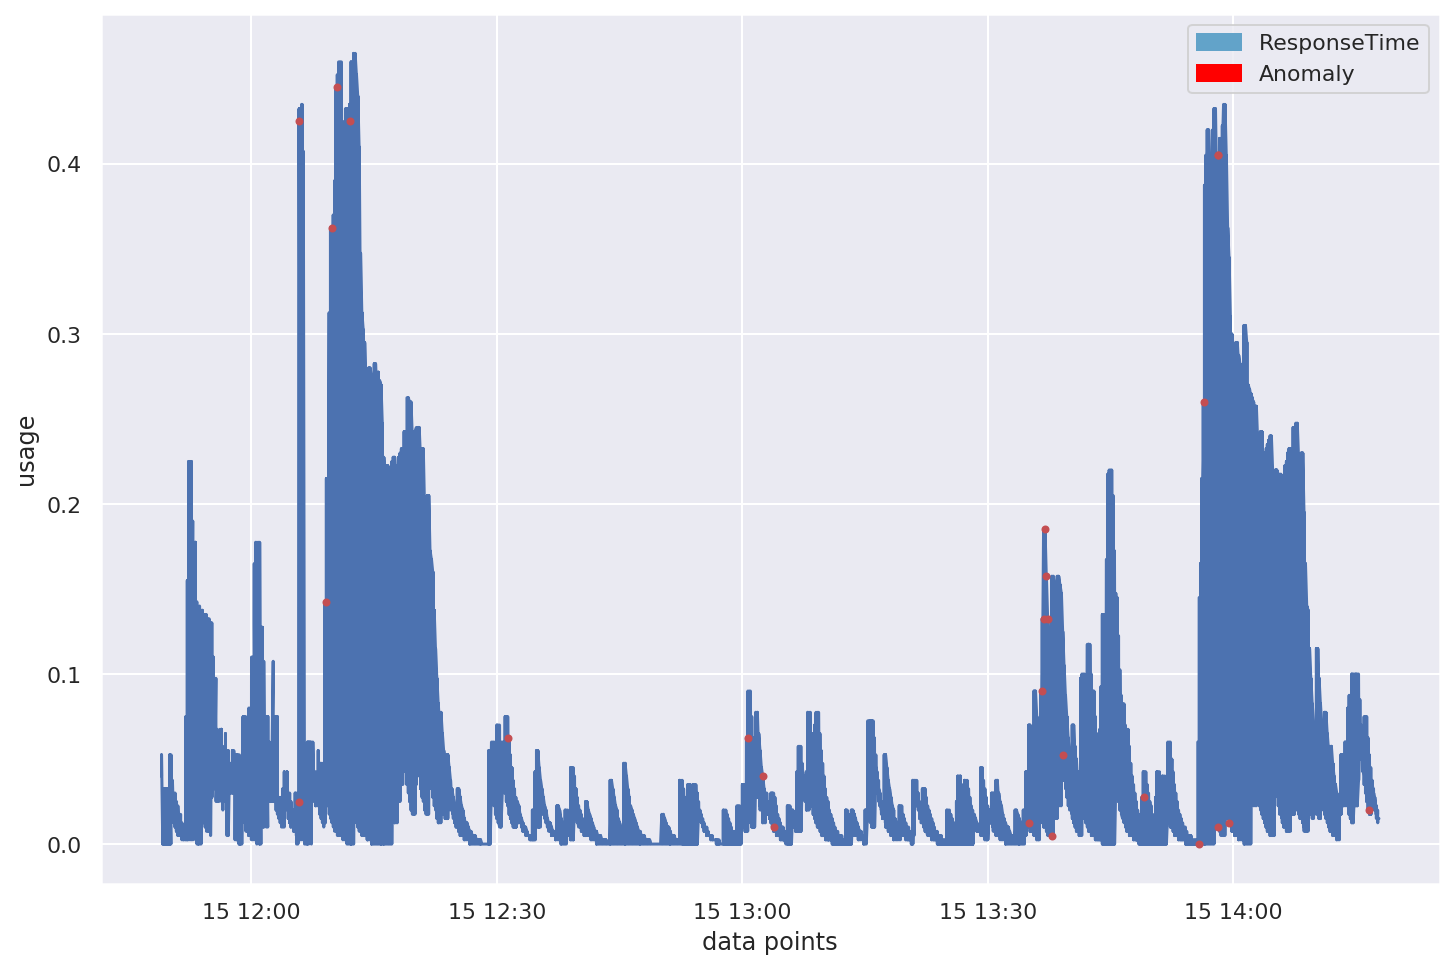

In [43]:
plt.figure(figsize = (12,8))
plt.plot(non_anom, linestyle = '-', label ='ResponseTime')
plt.plot(anom, 'ro', markersize = "3", label ='Anomaly')

red_patch = mpatches.Patch(color='red', label='Anomaly')
blue_lines = mpatches.Patch(color='#62A3C9', label='ResponseTime')

plt.legend(handles=[blue_lines, red_patch])
plt.ylabel('usage')
plt.xlabel('data points')
plt.show()

# More Insights

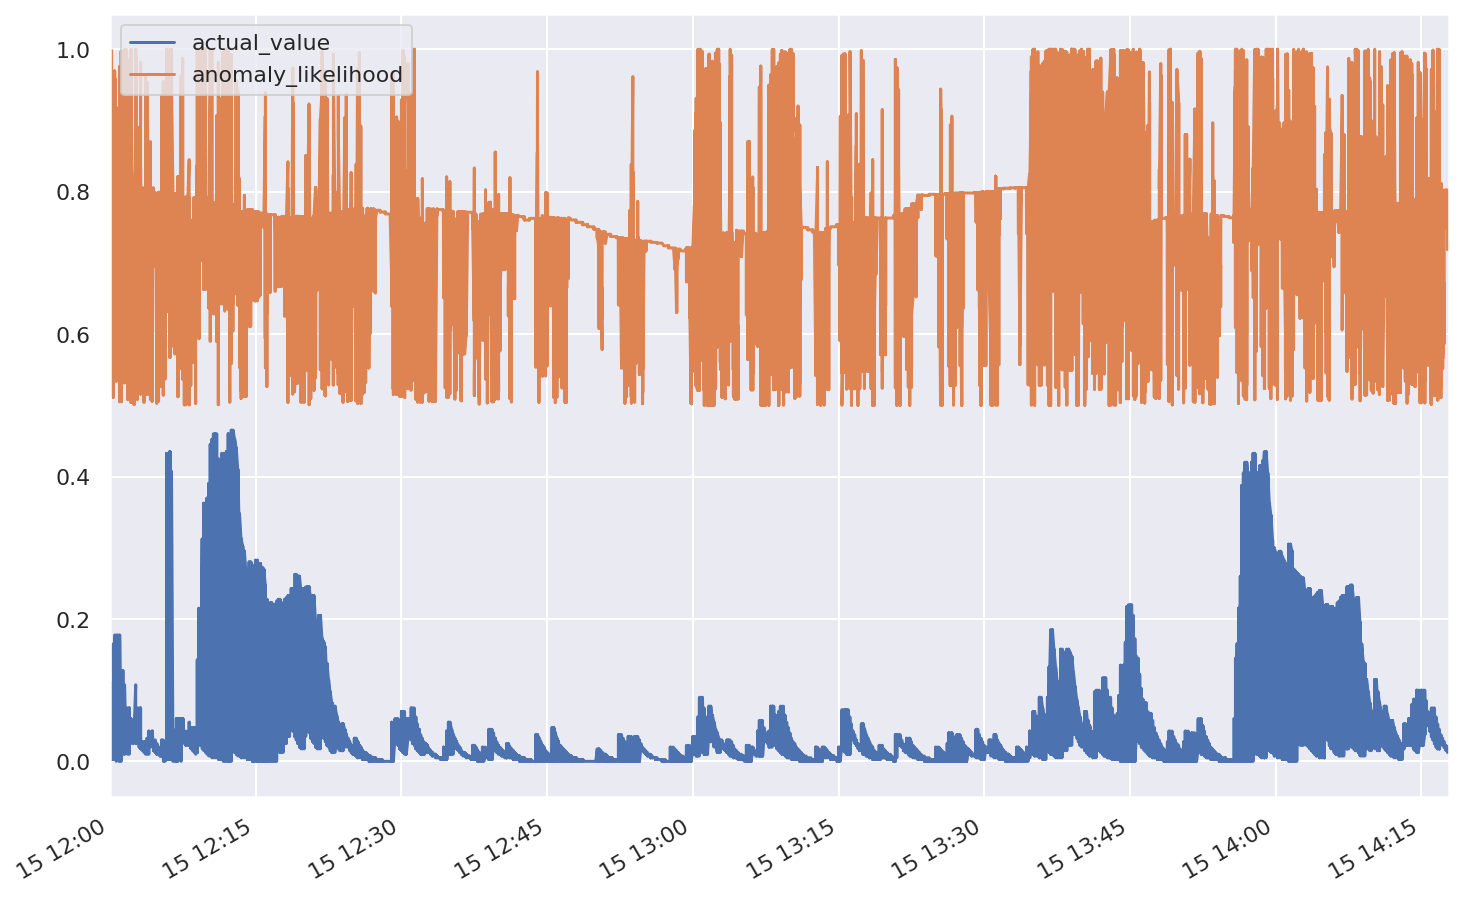

In [44]:
df1.loc['2018-11-15 12:00':'2018-11-15 14:30'][['actual_value','anomaly_likelihood']].plot(figsize=(12,8))

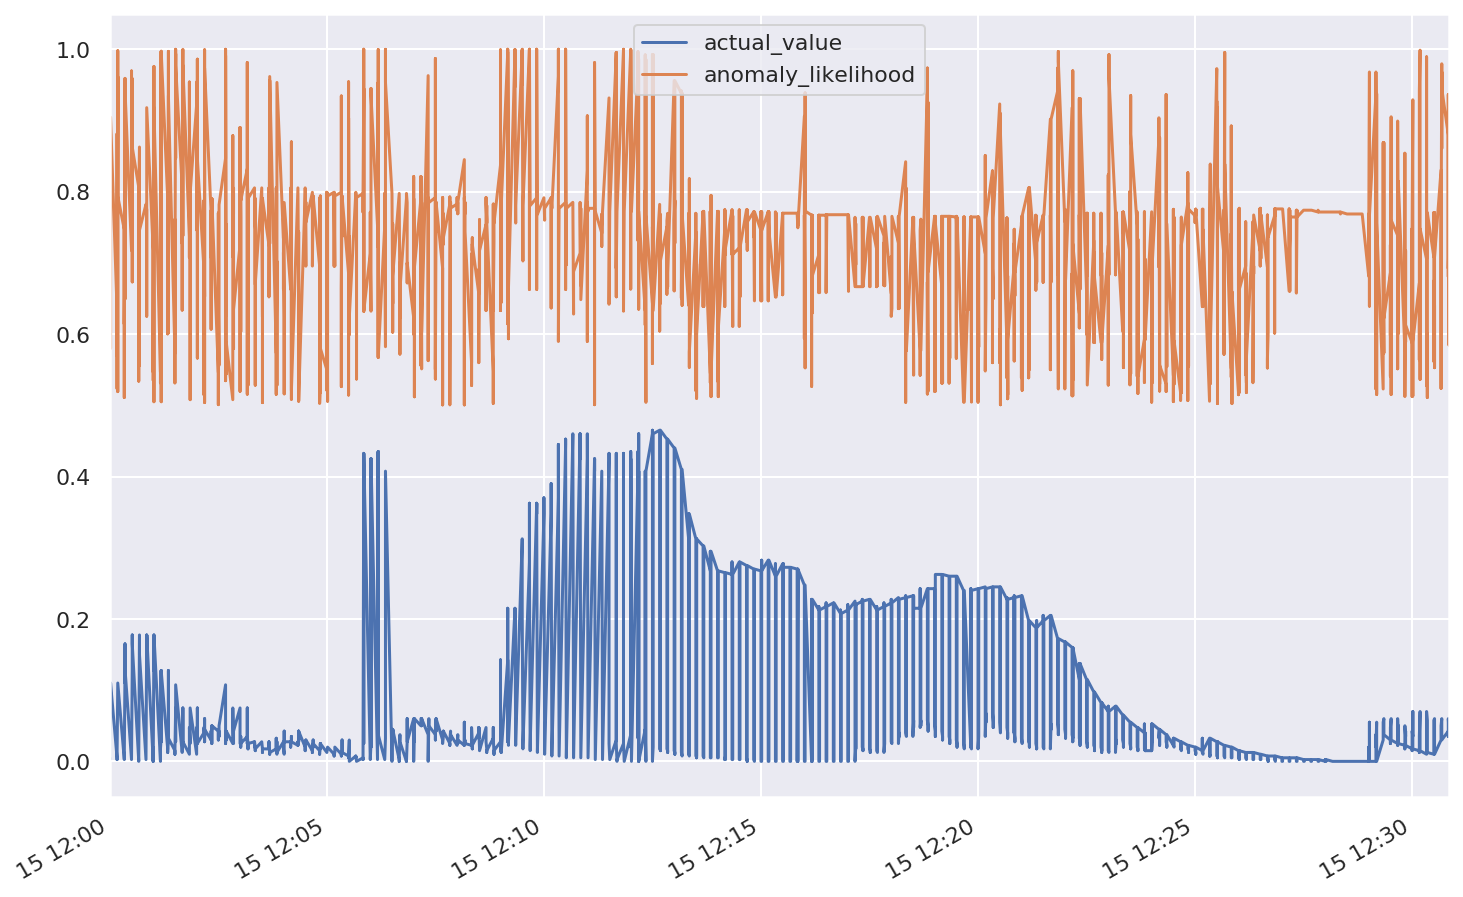

In [45]:
df1.loc['2018-11-15 12:00':'2018-11-15 12:30'][['actual_value','anomaly_likelihood']].plot(figsize=(12,8))

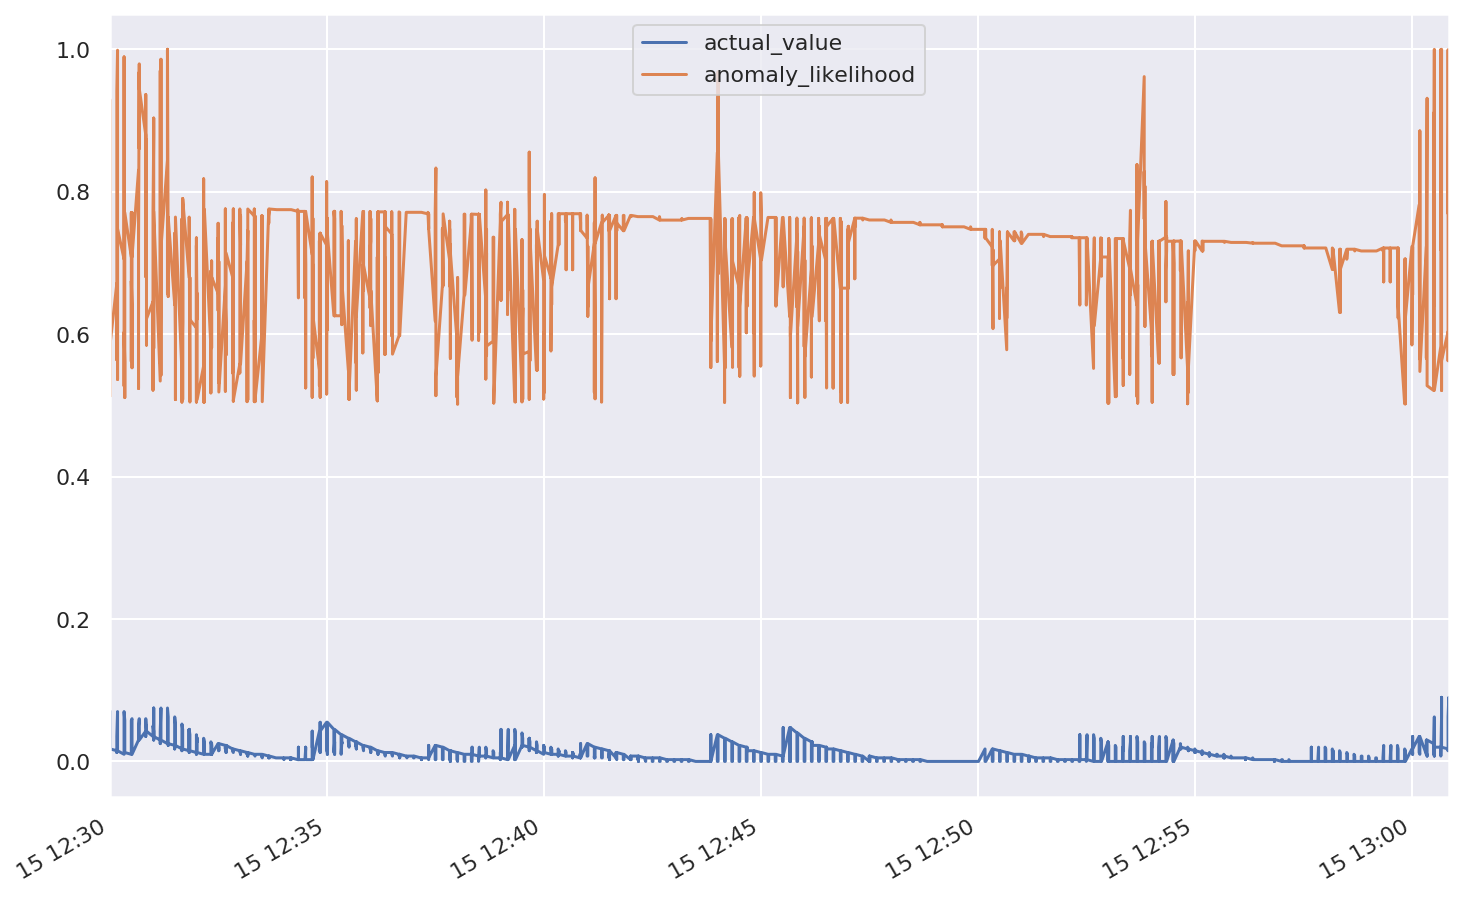

In [46]:
df1.loc['2018-11-15 12:30':'2018-11-15 13:00'][['actual_value','anomaly_likelihood']].plot(figsize=(12,8))

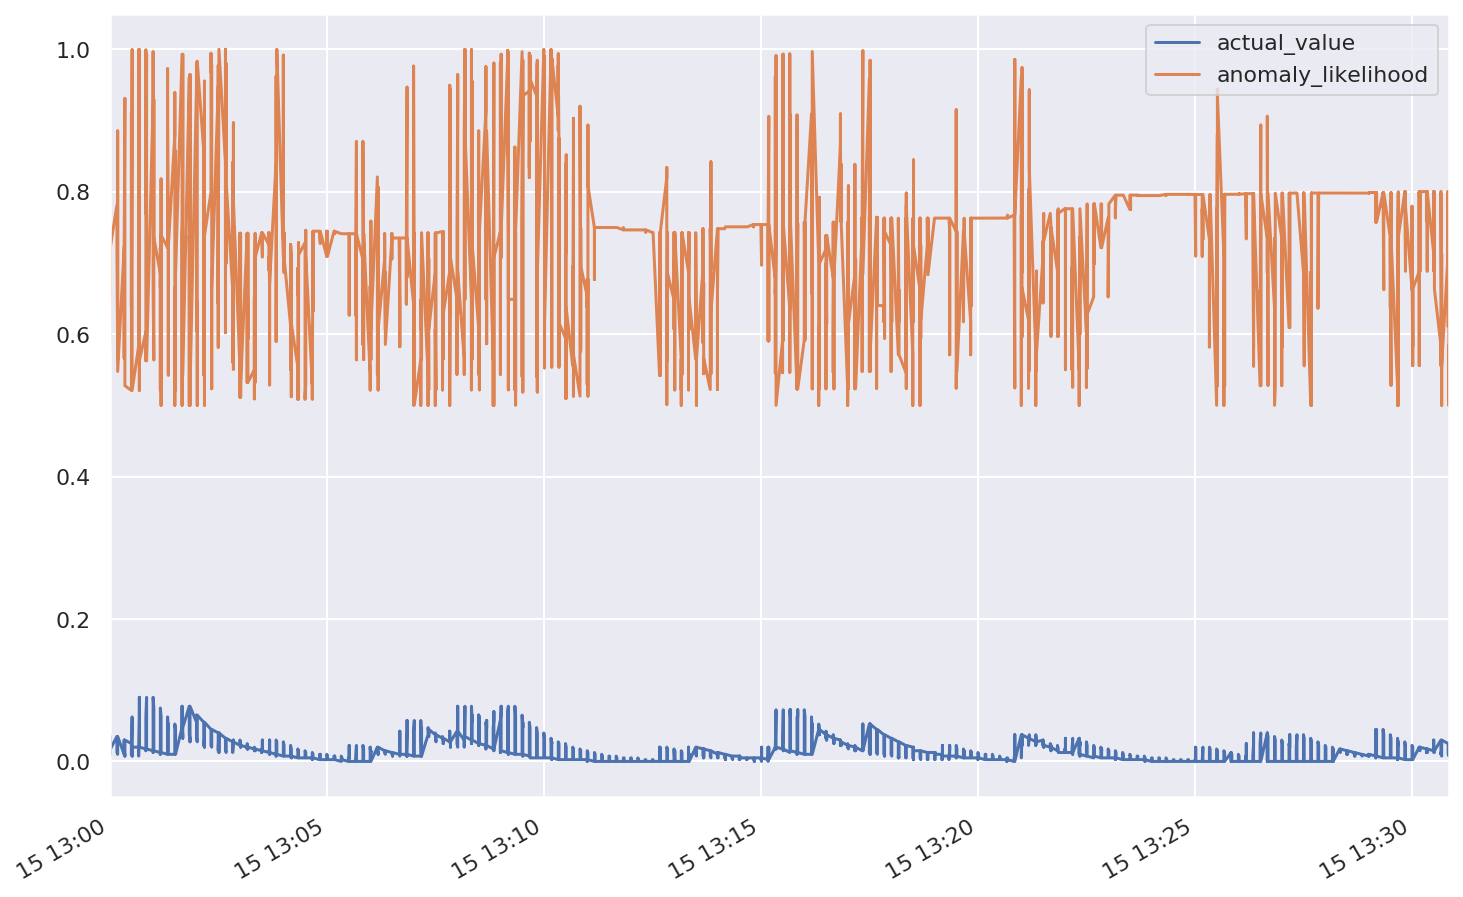

In [47]:
df1.loc['2018-11-15 13:00':'2018-11-15 13:30'][['actual_value','anomaly_likelihood']].plot(figsize=(12,8))

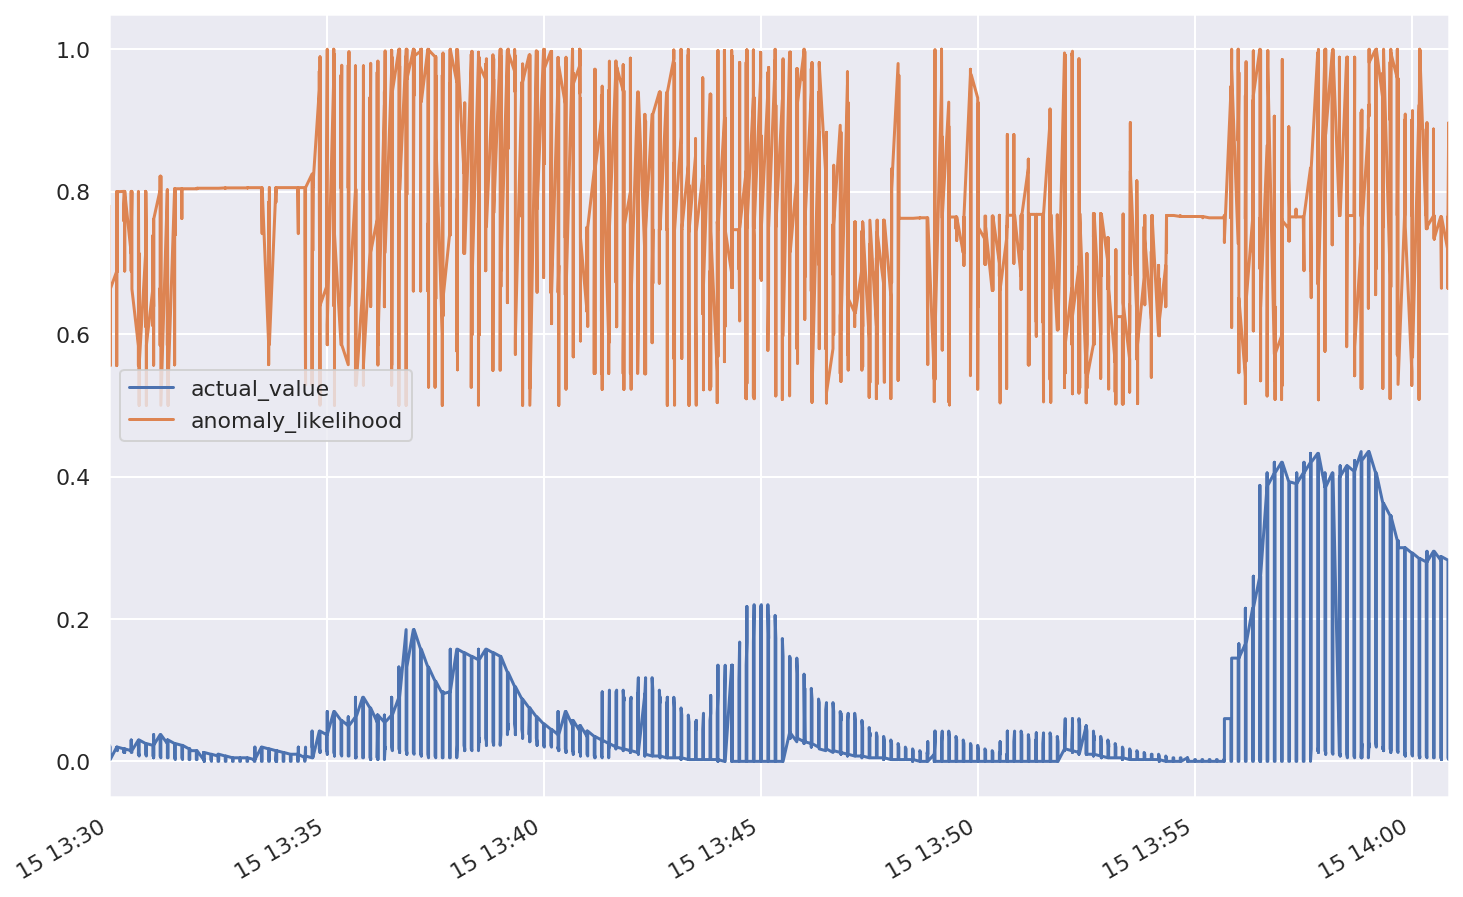

In [48]:
df1.loc['2018-11-15 13:30':'2018-11-15 14:00'][['actual_value','anomaly_likelihood']].plot(figsize=(12,8))

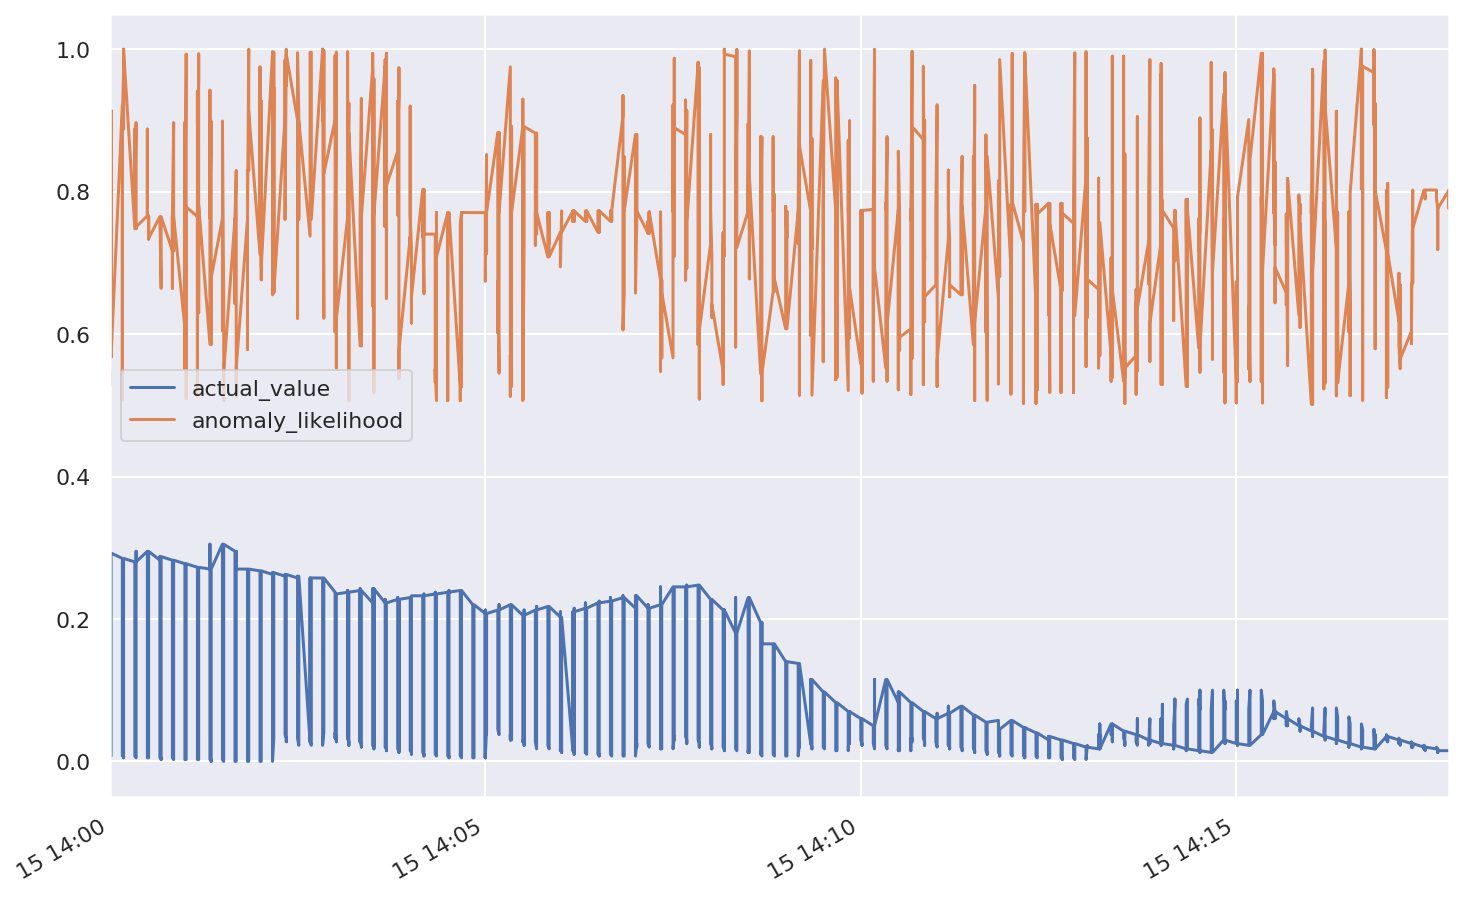

In [49]:
df1.loc['2018-11-15 14:00':'2018-11-15 14:30'][['actual_value','anomaly_likelihood']].plot(figsize=(12,8))

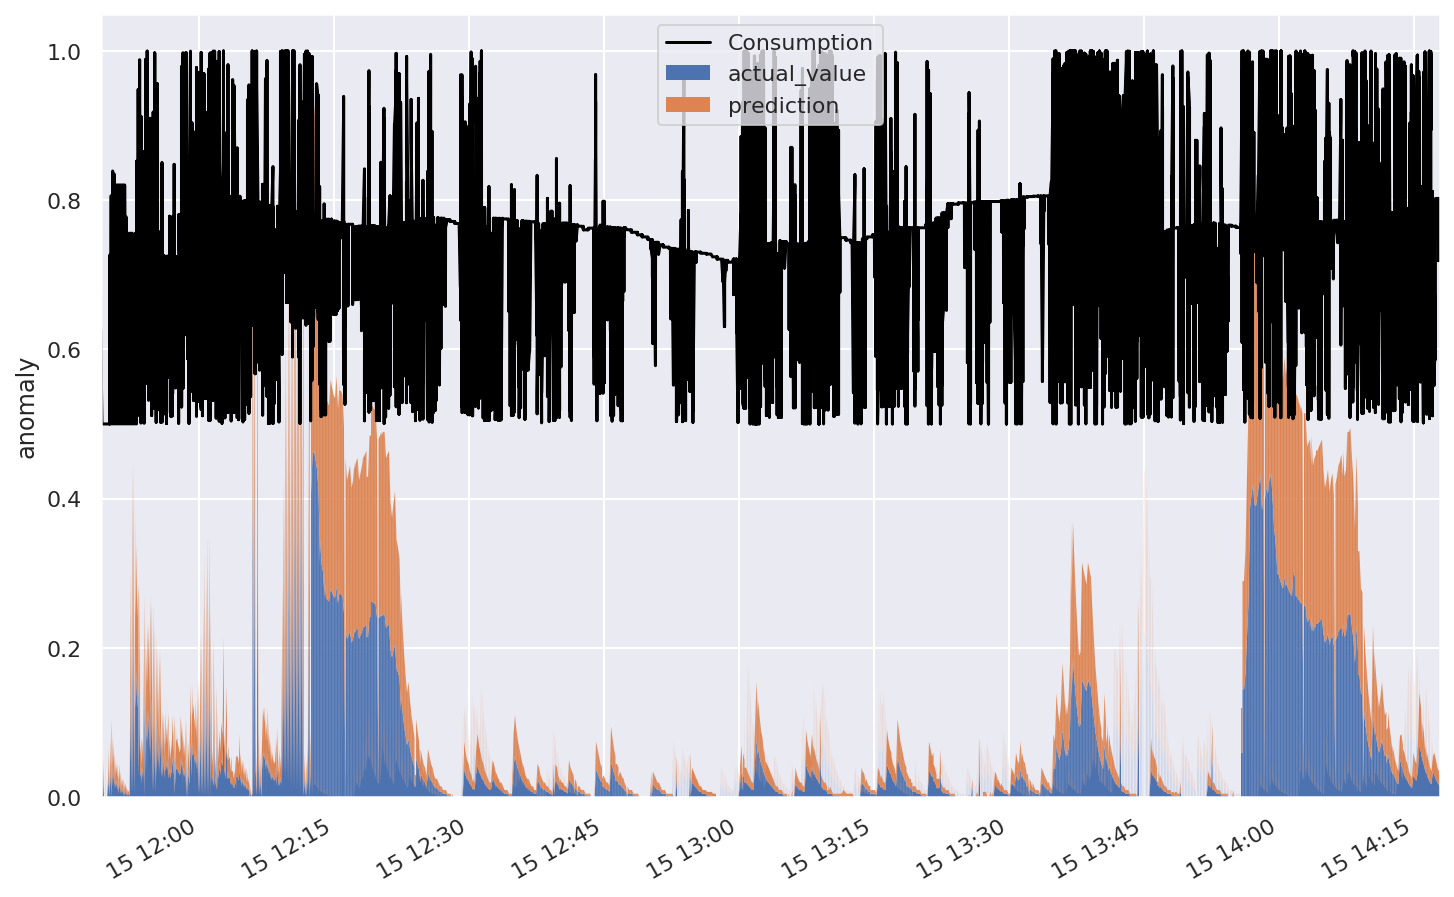

In [50]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df1['anomaly_likelihood'], color='black', label='Consumption')
df1[['actual_value', 'prediction']].plot.area(ax=ax, linewidth=0)
#ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('anomaly');

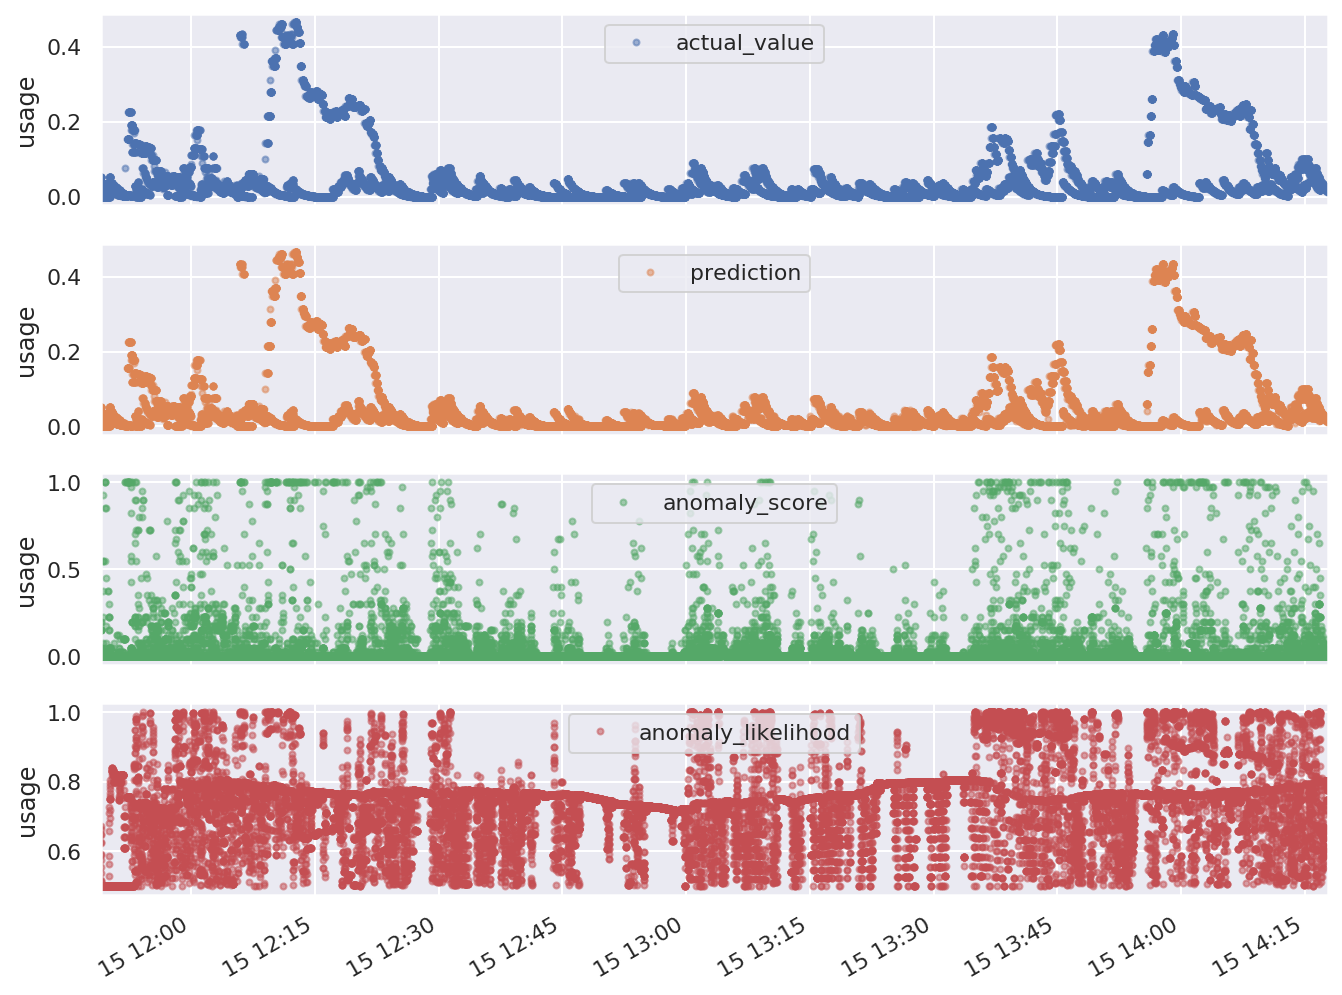

In [51]:
cols_plot = ['actual_value', 'prediction', 'anomaly_score', 'anomaly_likelihood']
axes = df1[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('usage')

# Custom Data Exploration

In [11]:
df = pd.read_csv('./data/load_1min_val_83k_changeofpoint_sm_try.csv',skiprows=[1,2])
df1 = df.copy()
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp').sort_index()
df.head()

load_1min
timestamp                         
2019-03-31 18:00:03.066        0.0
2019-03-31 18:00:03.066        0.0
2019-03-31 18:00:03.066        0.0
2019-03-31 18:00:03.066        0.0
2019-03-31 18:00:03.066        0.0

In [6]:
df['load_1min'].describe()

count    363240.000000
mean          0.116581
std           0.188266
min           0.000000
25%           0.006300
50%           0.016300
75%           0.090000
max           1.172500
Name: load_1min, dtype: float64

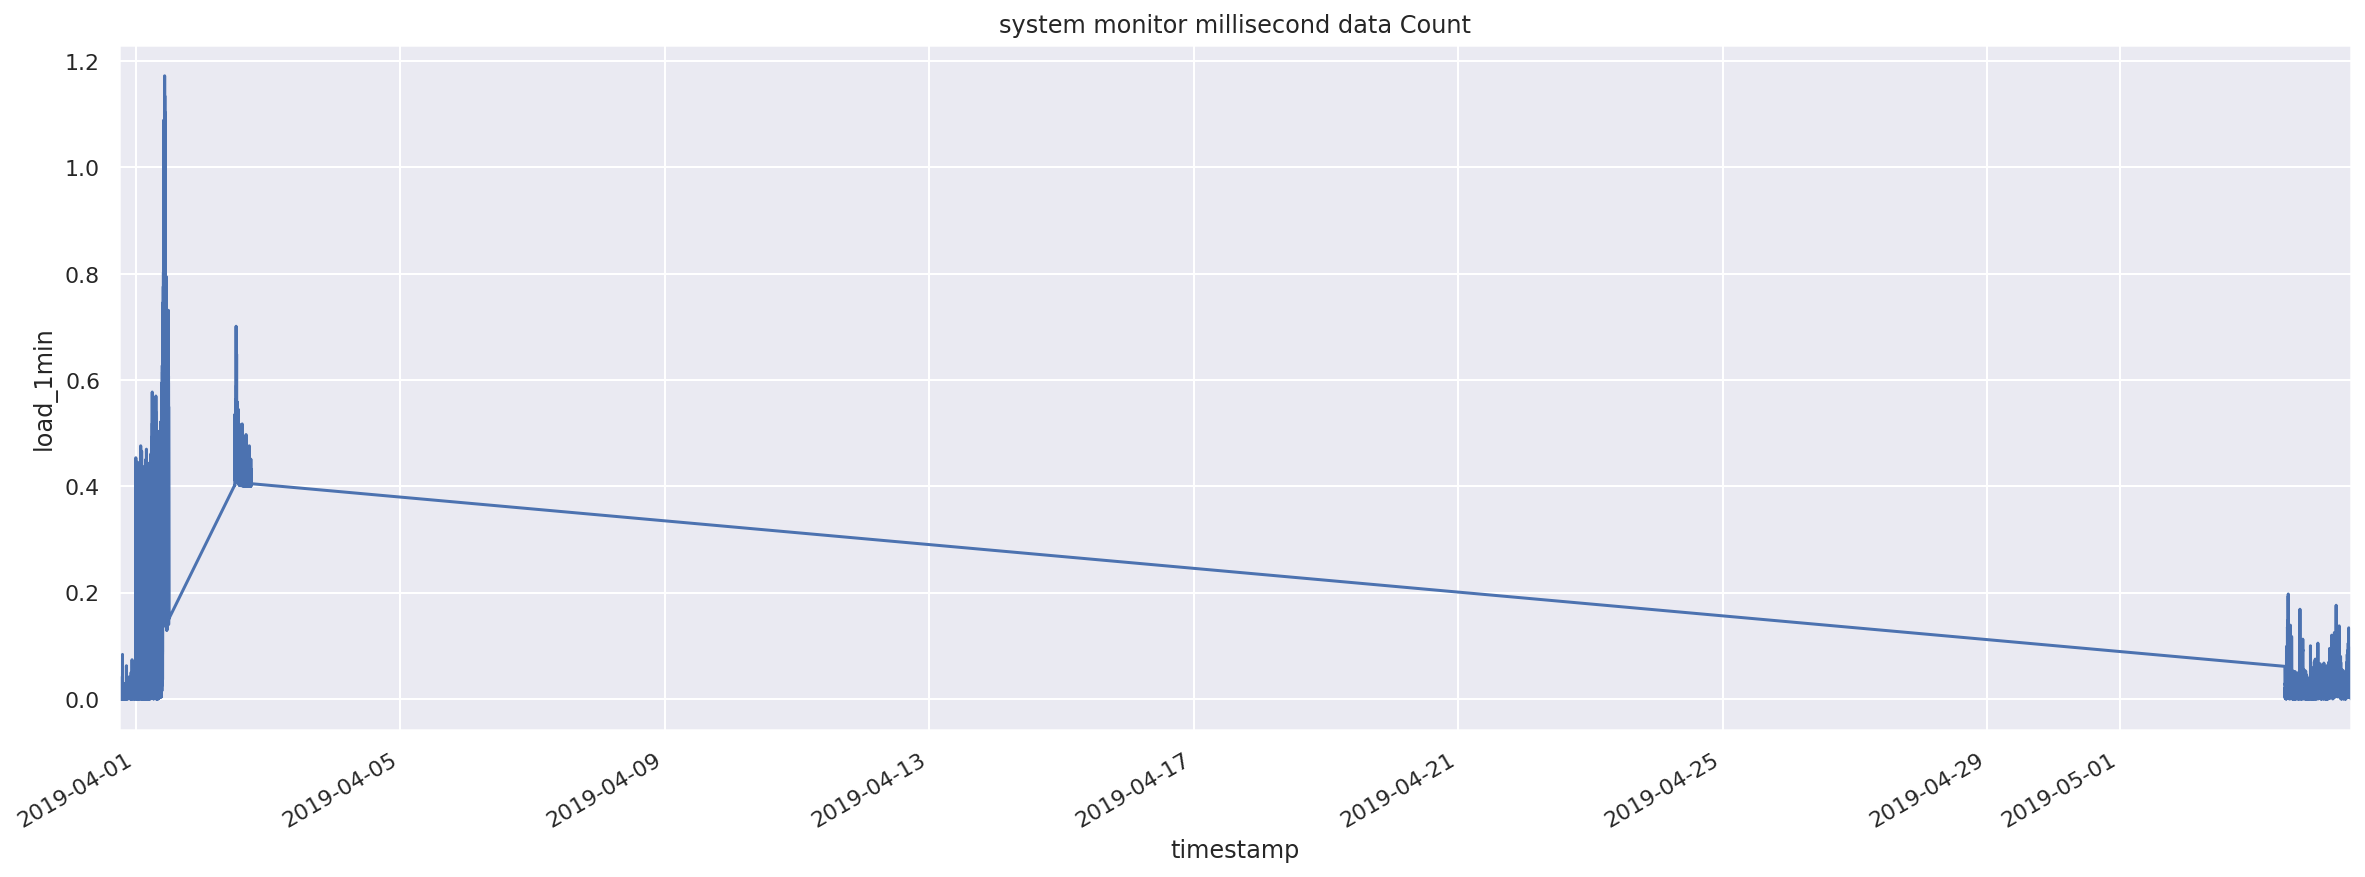

In [7]:
df.plot(figsize=(20,7), legend=None, title='system monitor millisecond data Count')
plt.xlabel('timestamp')
plt.ylabel('load_1min')
plt.show()

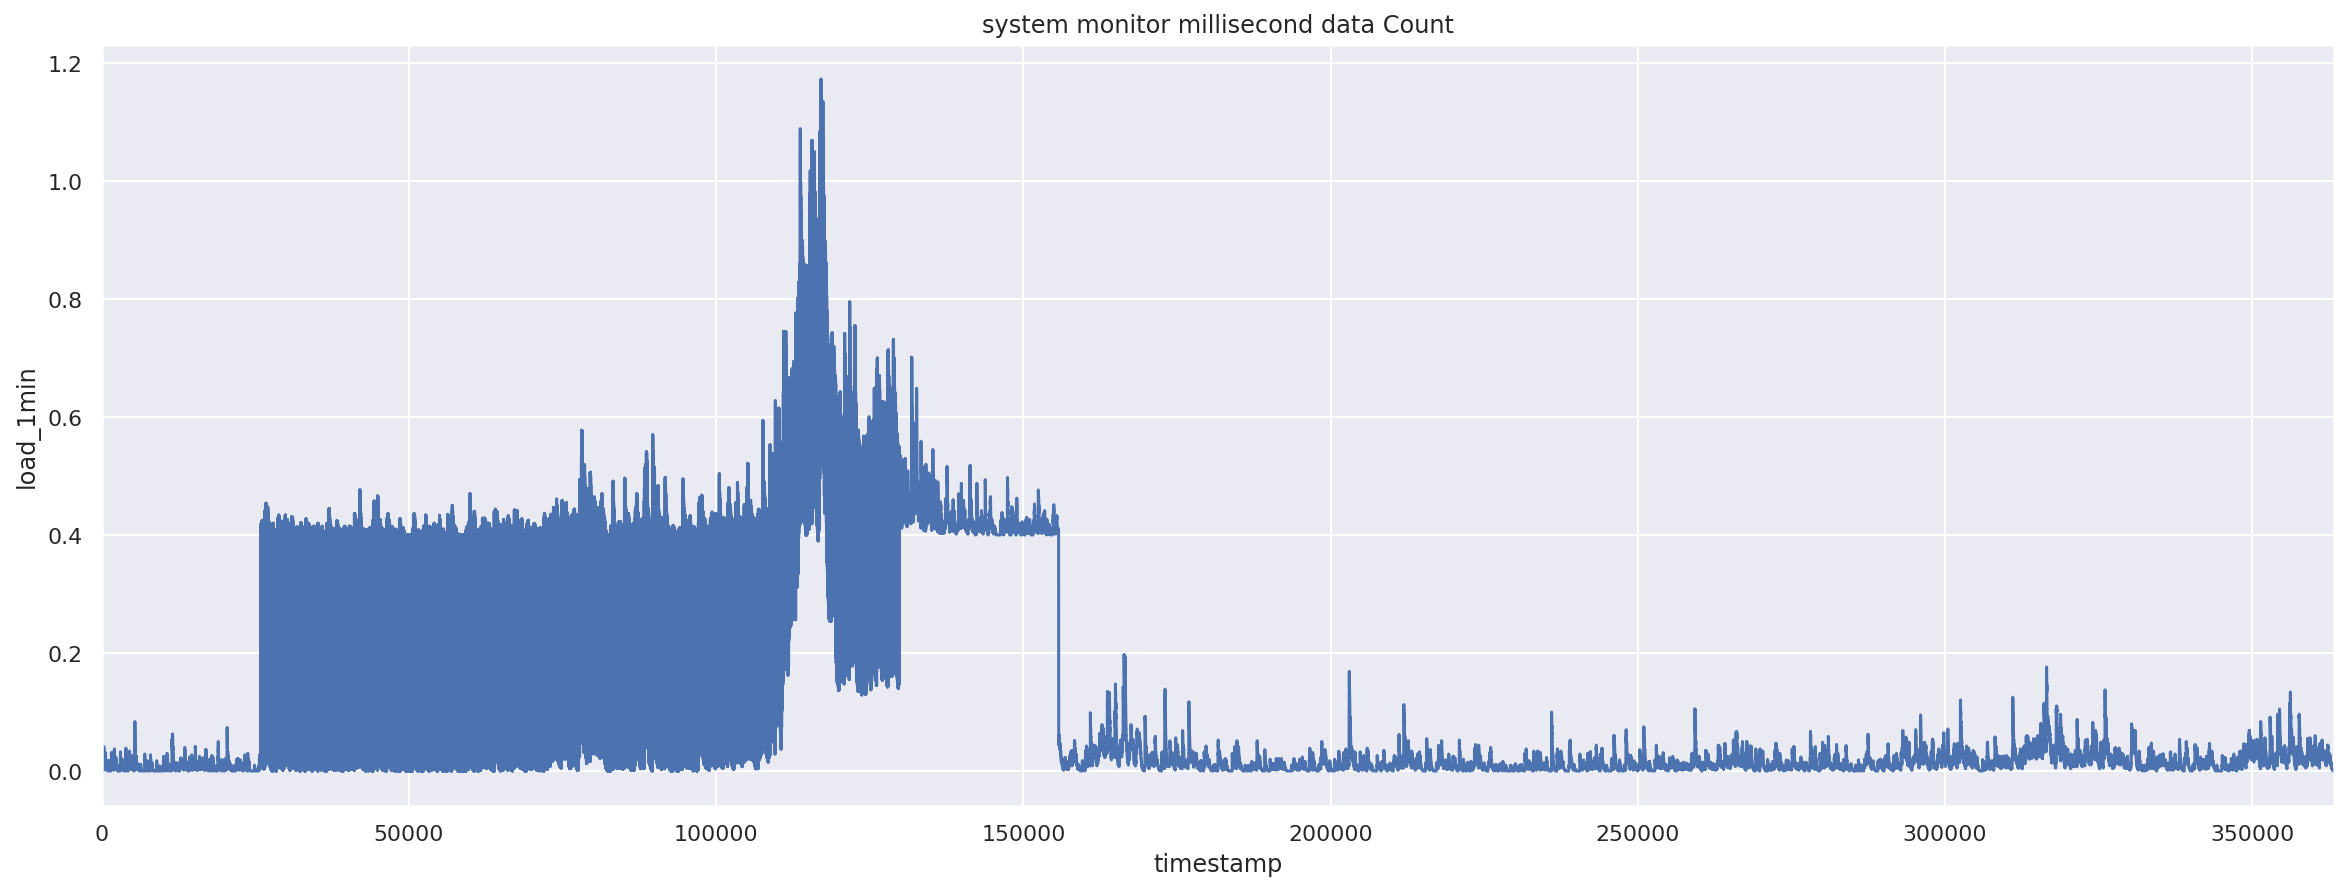

In [12]:
df1.plot(figsize=(20,7), legend=None, title='system monitor millisecond data Count')
plt.xlabel('timestamp')
plt.ylabel('load_1min')
plt.show()

In [3]:
#1milisec = 50
#1sec = 50*60 = 3000
#1min = 50*60*60 = 180000
'''
windows = [
    ('1 sec', 3000),
    ('n sec', 10000)
]

for label, window_size in windows:
    mp, mpi = stomp(df['load_1min'].values, window_size)
    df['{} Profile'.format(label)] = np.append(mp, np.zeros(window_size - 1) + np.nan)
    df['{} Profile Index'.format(label)] = np.append(mpi, np.zeros(window_size - 1) + np.nan)
'''

"\nwindows = [\n    ('1 sec', 3000),\n    ('n sec', 10000)\n]\n\nfor label, window_size in windows:\n    mp, mpi = stomp(df['load_1min'].values, window_size)\n    df['{} Profile'.format(label)] = np.append(mp, np.zeros(window_size - 1) + np.nan)\n    df['{} Profile Index'.format(label)] = np.append(mpi, np.zeros(window_size - 1) + np.nan)\n"

In [16]:
mp = pd.read_csv('./test1/mp_columns_out')
mpi = pd.read_csv('./test1/mp_columns_out_index')
print(mp[:5])
print(mpi[:5])

window_size = 1000
df1['1k-w Profile'] = np.append(mp, np.zeros(window_size) + np.nan)
df1['1k-w Profile Index'] = np.append(mpi, np.zeros(window_size) + np.nan)

   20.11377695
0    20.099767
1    20.085745
2    20.071706
3    20.057655
4    20.043591
   7597
0  7598
1  7599
2  7600
3  7601
4  7602


# Plot Matrix Profiles

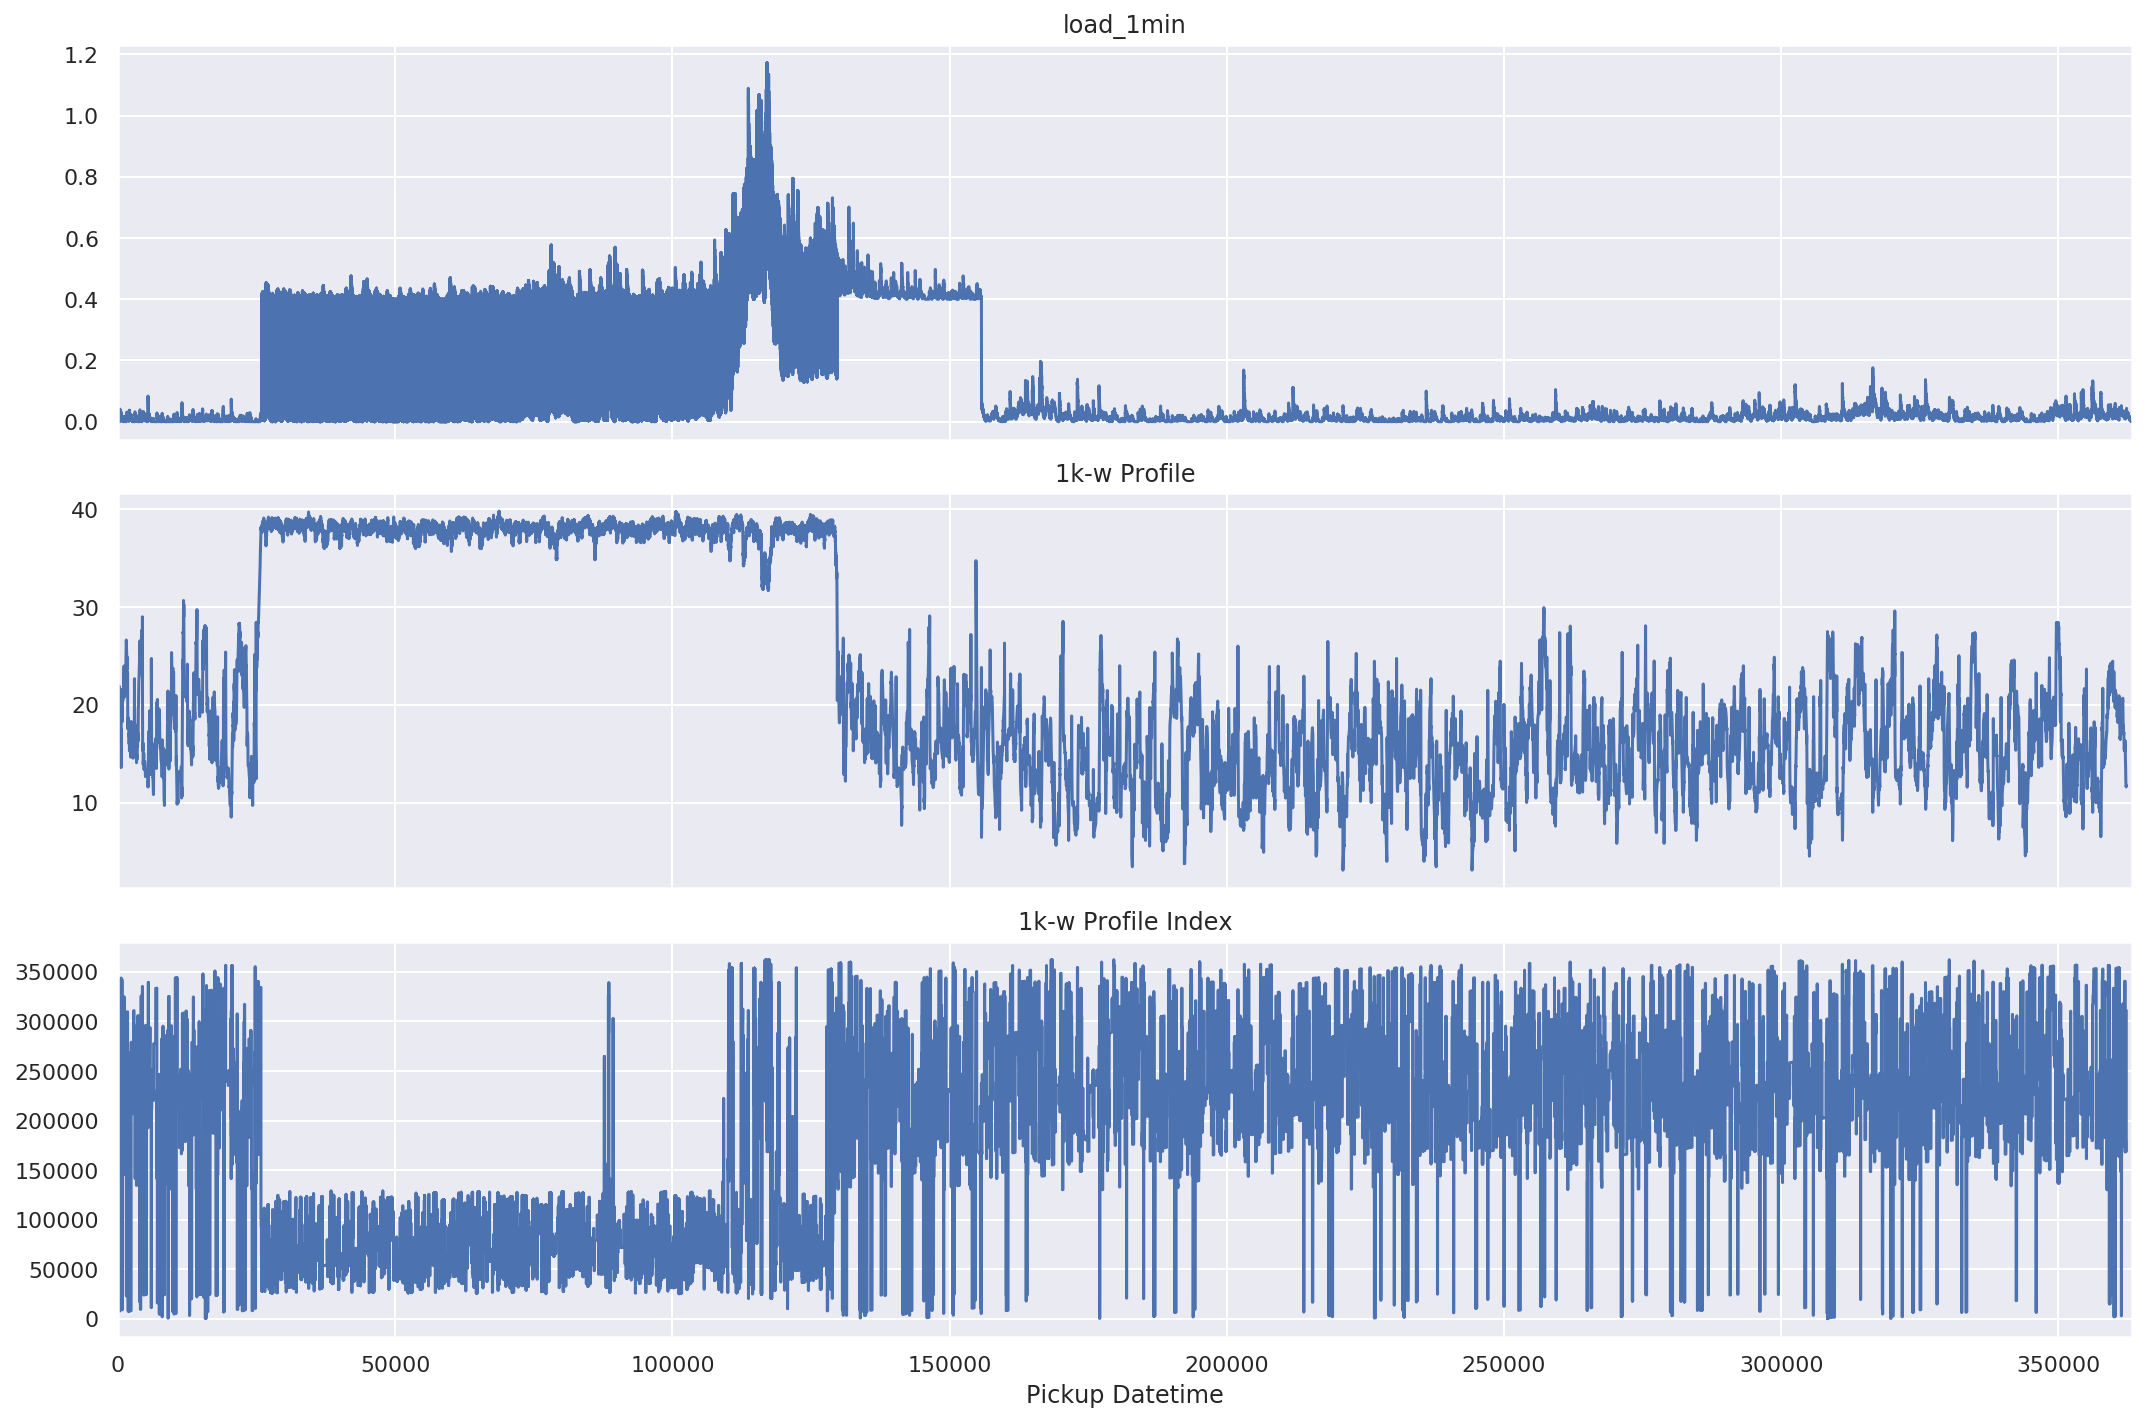

In [53]:
#Plot the signal data
fig, axes = plt.subplots(3,1,sharex=True,figsize=(15,10))

#df['4 Hours Profile'].plot(ax=axes[0], title='4 Hour Matrix Profile')
#df['8 Hours Profile'].plot(ax=axes[1], title='8 Hour Matrix Profile')
#df['12 Hours Profile'].plot(ax=axes[2], title='12 Hour Matrix Profile')
#df['24 Hours Profile'].plot(ax=axes[3], title='24 Hour Matrix Profile')
#df['7 Days Profile'].plot(ax=axes[4], title='7 Day Matrix Profile')
df1['load_1min'].plot(ax=axes[0], title='load_1min')
df1['1k-w Profile'].plot(ax=axes[1], title='1k-w Profile')
df1['1k-w Profile Index'].plot(ax=axes[2], title='1k-w Profile Index')
plt.xlabel('Pickup Datetime')
plt.tight_layout()
plt.show()

# Find Discords

In [4]:
'''
top_discords = {}

for label, window_size in windows:
    column_label = '{} Profile'.format(label)
    mp = df[column_label].values
    top_discords[label] = discords(mp, window_size, k=5)
    
    ax = df.plot(kind='line', y=column_label, figsize=(15, 7), title=label, legend=None)
    for start_index in top_discords[label]:
        df.iloc[start_index:start_index+window_size][column_label].plot(kind='line', c='r')
    
    plt.show()
'''

"\ntop_discords = {}\n\nfor label, window_size in windows:\n    column_label = '{} Profile'.format(label)\n    mp = df[column_label].values\n    top_discords[label] = discords(mp, window_size, k=5)\n    \n    ax = df.plot(kind='line', y=column_label, figsize=(15, 7), title=label, legend=None)\n    for start_index in top_discords[label]:\n        df.iloc[start_index:start_index+window_size][column_label].plot(kind='line', c='r')\n    \n    plt.show()\n"

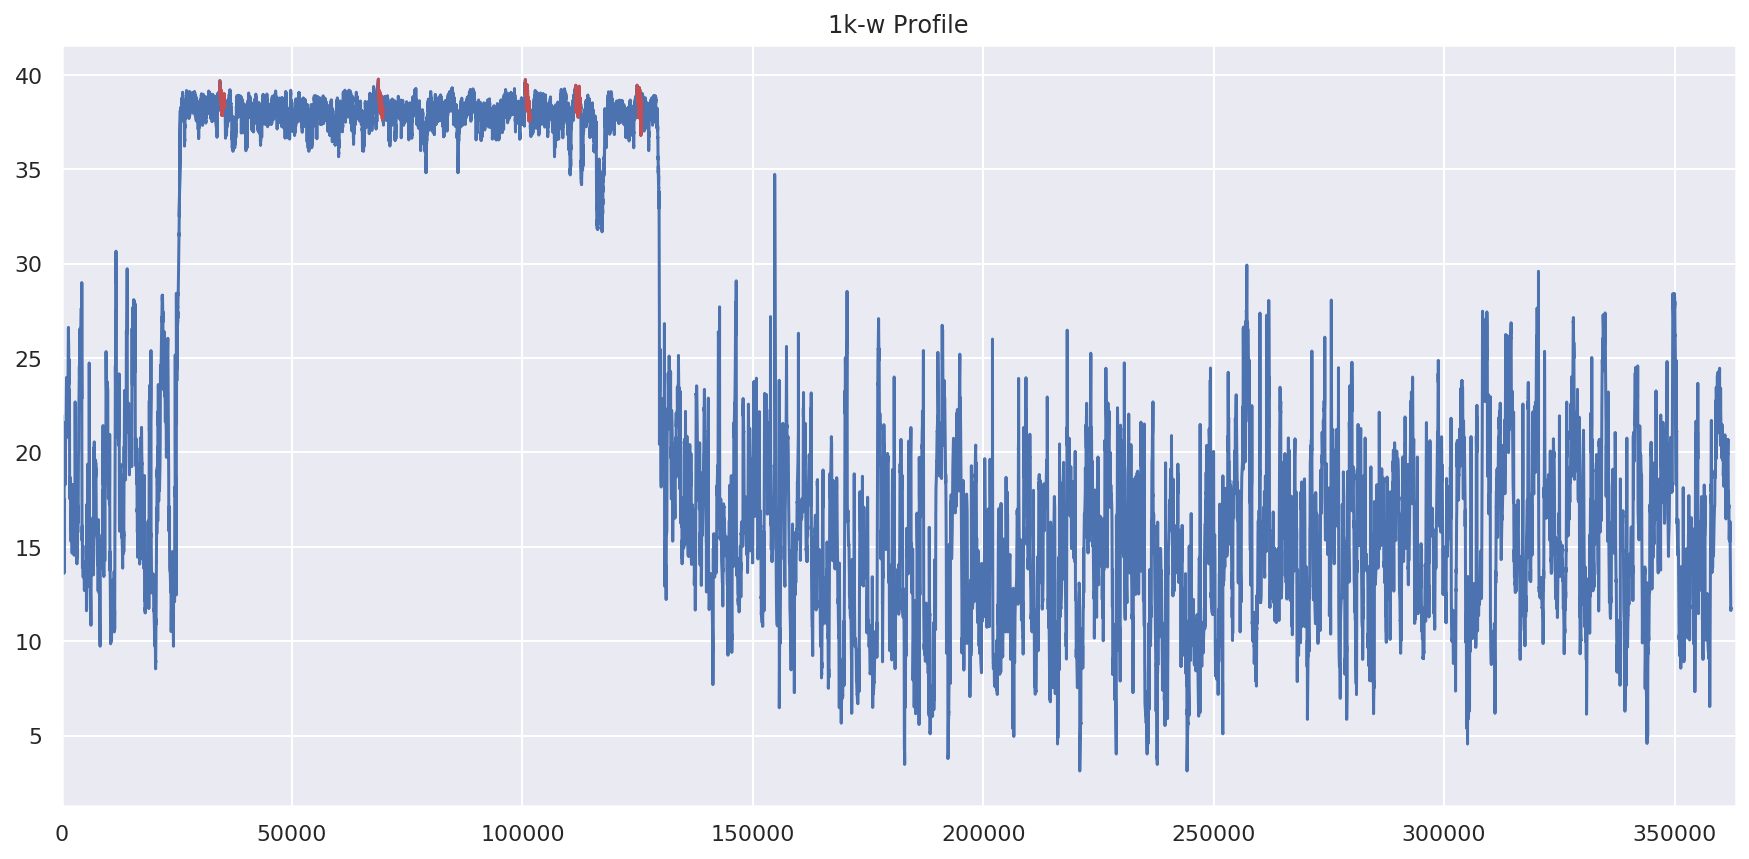

In [32]:
top_discords = discords(mp, window_size, k=5)
ax = df1.plot(kind='line', y='1k-w Profile', figsize=(15, 7), title='1k-w Profile', legend=None)

for start_index in top_discords:
    df1.iloc[start_index:start_index+window_size]['1k-w Profile'].plot(kind='line', c='r')
    
plt.show()

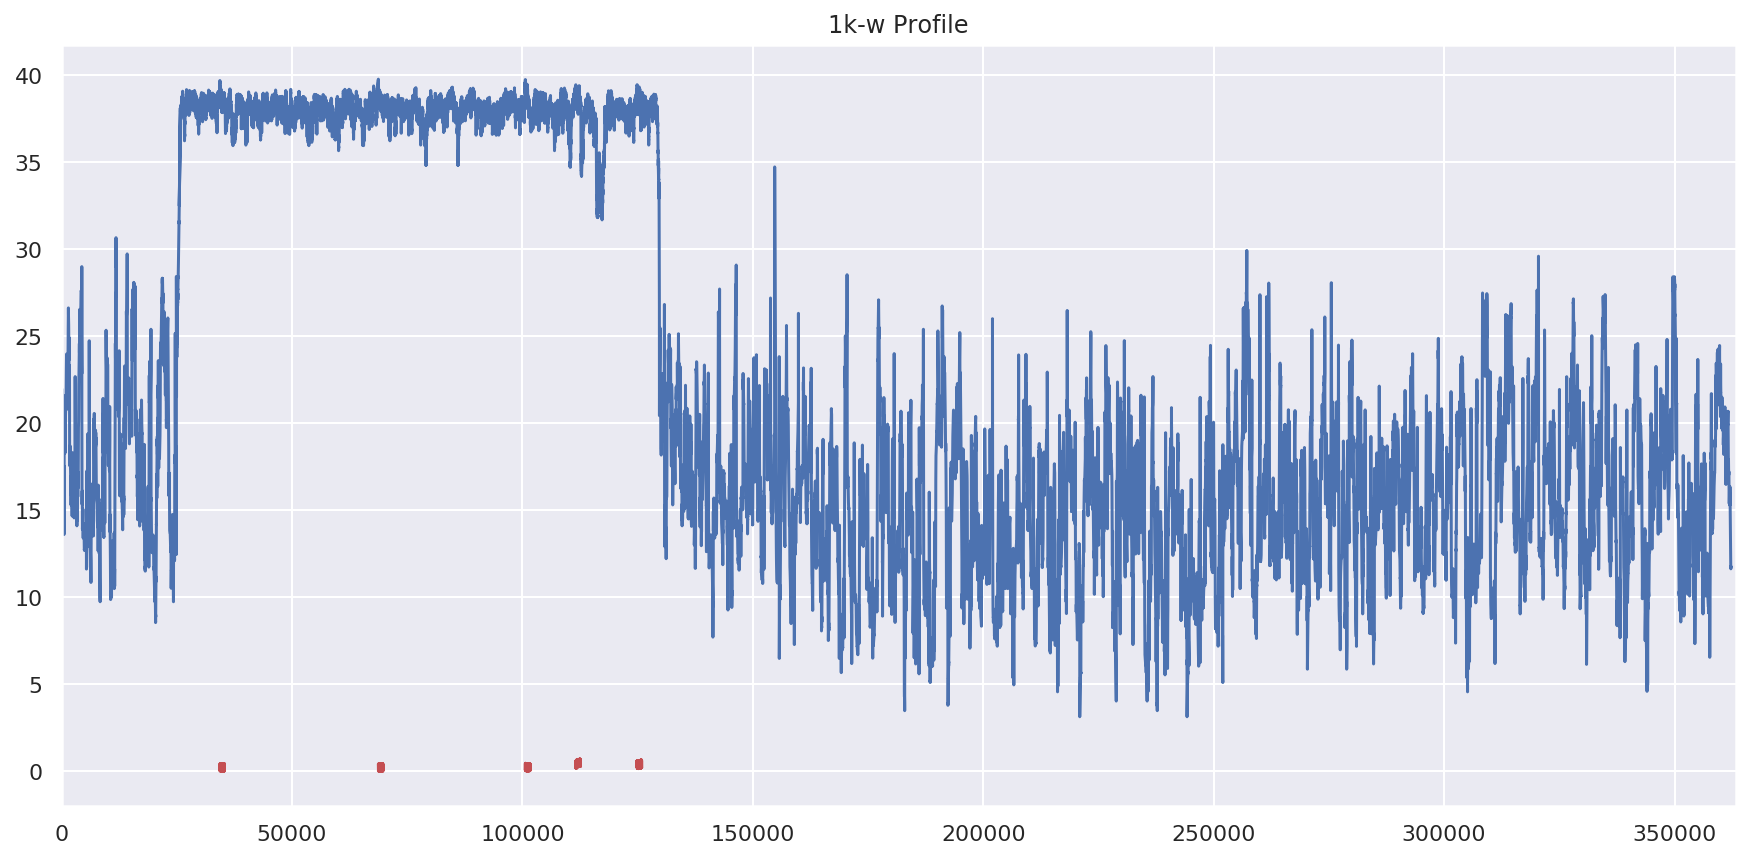

In [37]:
top_discords = discords(mp, window_size, k=5)
ax = df1.plot(kind='line', y='1k-w Profile', figsize=(15, 7), title='1k-w Profile', legend=None)

for start_index in top_discords:
    df1.iloc[start_index:start_index+window_size]['load_1min'].plot(kind='line', c='r')
    
plt.show()

In [42]:
non_anom = df1[~df1.index.isin(top_discords)]['load_1min']
anom = df1[df1.index.isin(top_discords)]['load_1min']

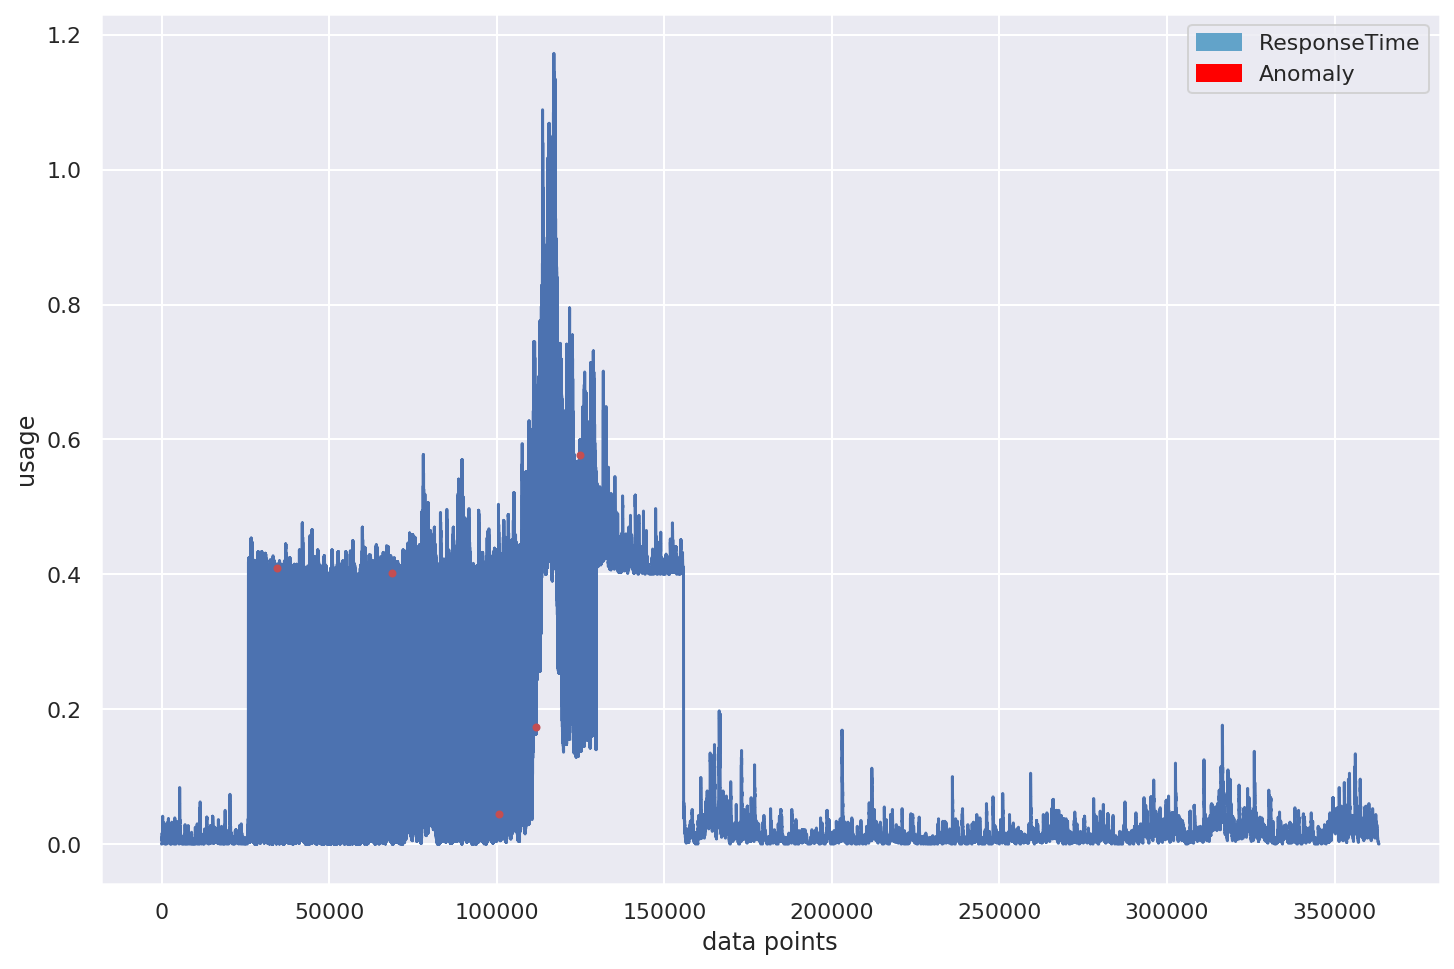

In [44]:
plt.figure(figsize = (12,8))
plt.plot(non_anom, linestyle = '-', label ='ResponseTime')
plt.plot(anom, 'ro', markersize = "3", label ='Anomaly')

red_patch = mpatches.Patch(color='red', label='Anomaly')
blue_lines = mpatches.Patch(color='#62A3C9', label='ResponseTime')

plt.legend(handles=[blue_lines, red_patch])
plt.ylabel('usage')
plt.xlabel('data points')
plt.show()

In [55]:
non_anom = []
anom = []
for start_index in top_discords:
    anom.append(df1.iloc[start_index:start_index+window_size]['load_1min'])
anom_df = pd.concat(anom)
print(anom_df.head())
non_anom = df1[~df1.index.isin(anom_df.index)]['load_1min']
anom = df1[df1.index.isin(anom_df.index)]['load_1min']

68745    0.4025
68746    0.0025
68747    0.0025
68748    0.4025
68749    0.0025
Name: load_1min, dtype: float64


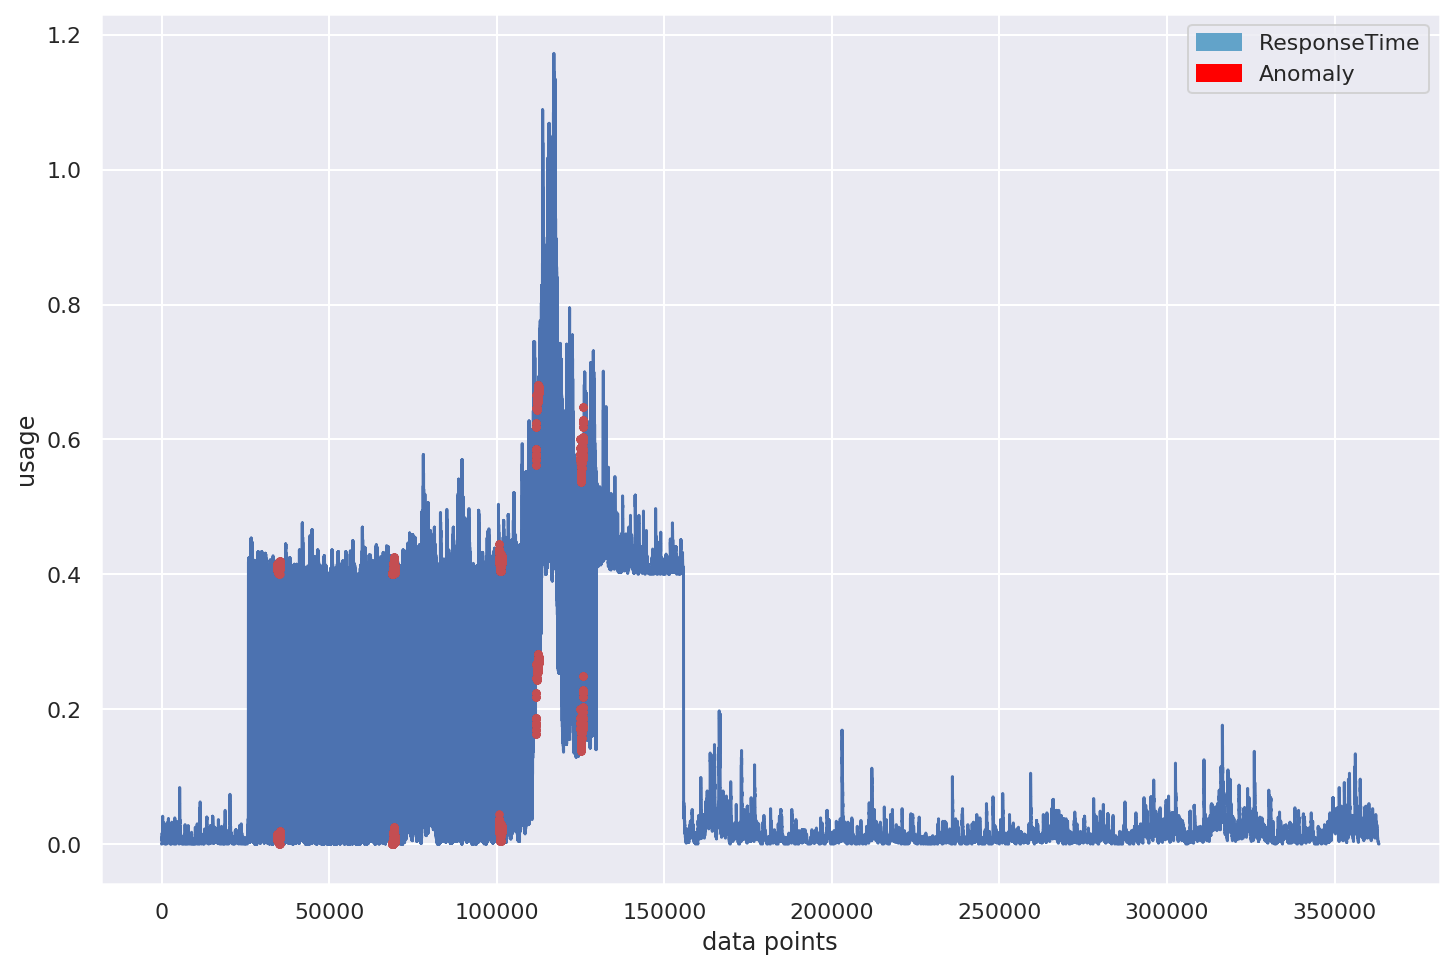

In [56]:
plt.figure(figsize = (12,8))
plt.plot(non_anom, linestyle = '-', label ='ResponseTime')
plt.plot(anom, 'ro', markersize = "3", label ='Anomaly')

red_patch = mpatches.Patch(color='red', label='Anomaly')
blue_lines = mpatches.Patch(color='#62A3C9', label='ResponseTime')

plt.legend(handles=[blue_lines, red_patch])
plt.ylabel('usage')
plt.xlabel('data points')
plt.show()

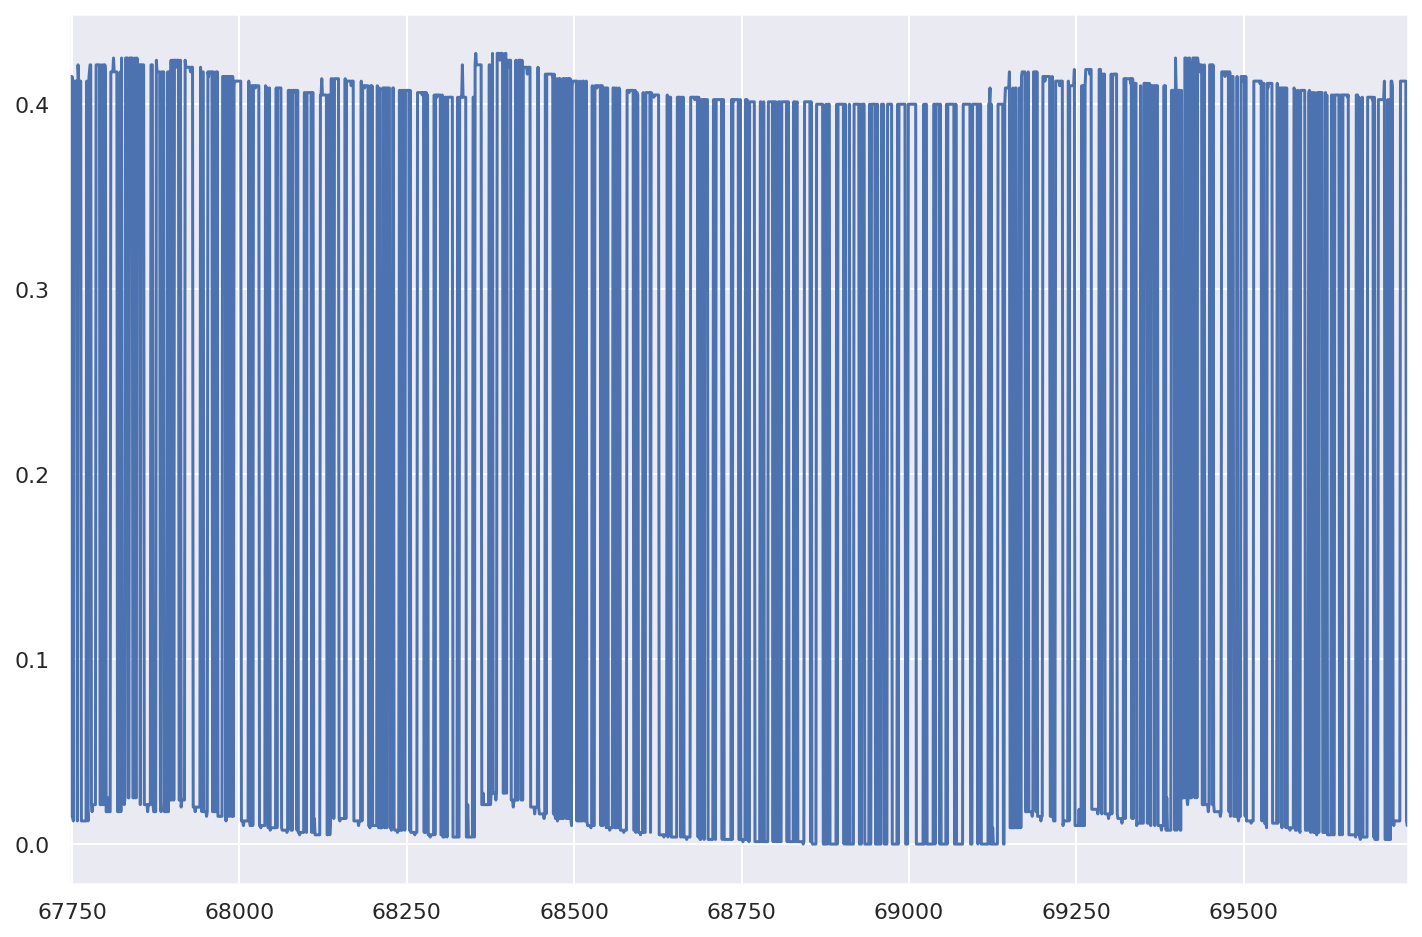

In [45]:
df1.loc[67745:69745]['load_1min'].plot(figsize=(12,8))

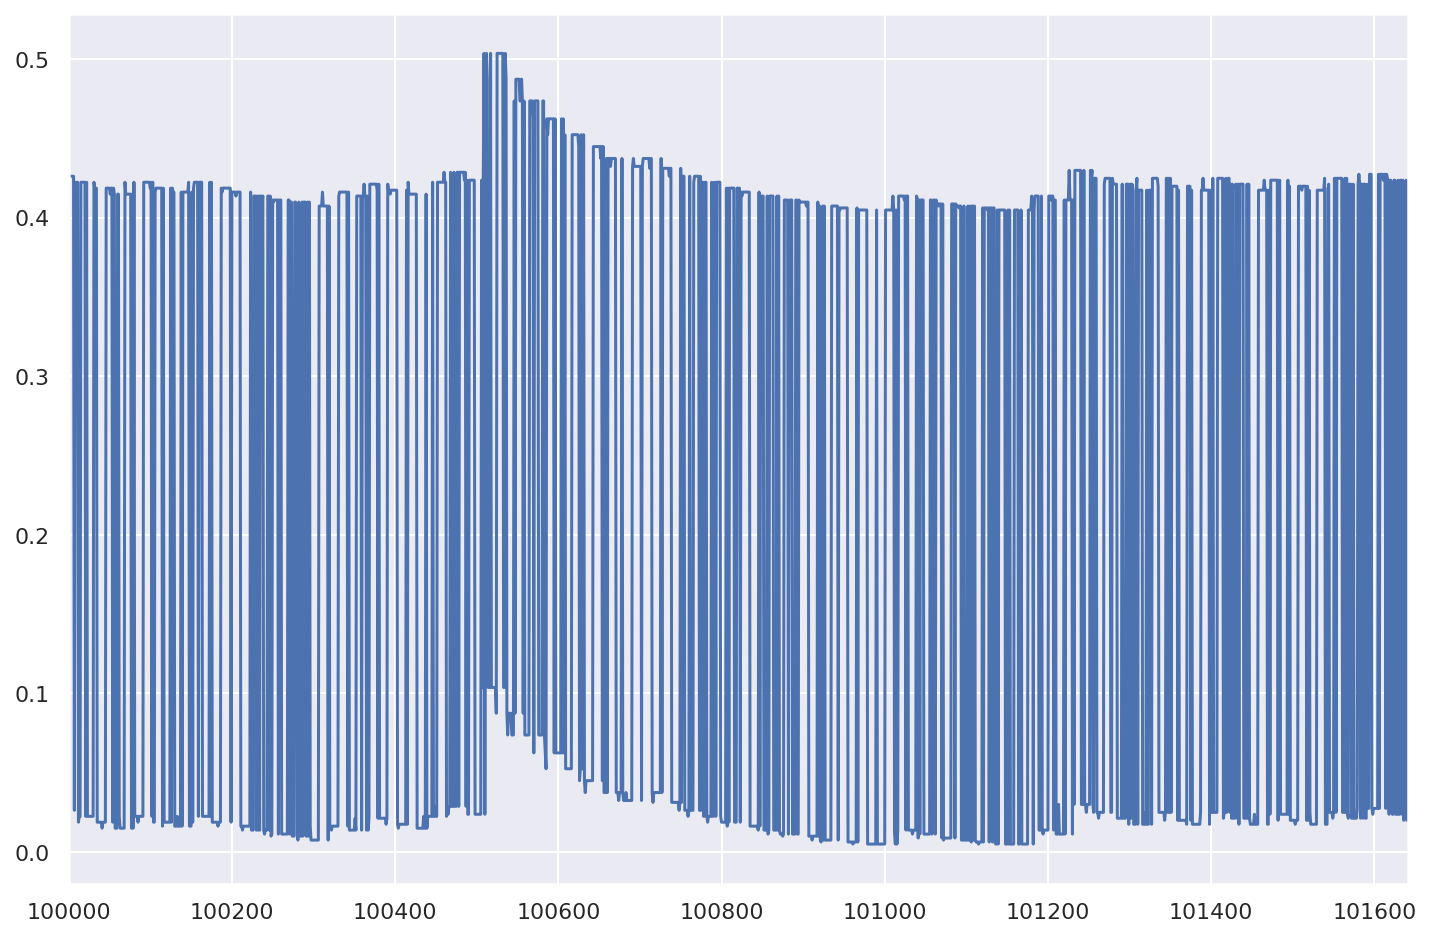

In [46]:
df1.loc[100000:101641]['load_1min'].plot(figsize=(12,8))

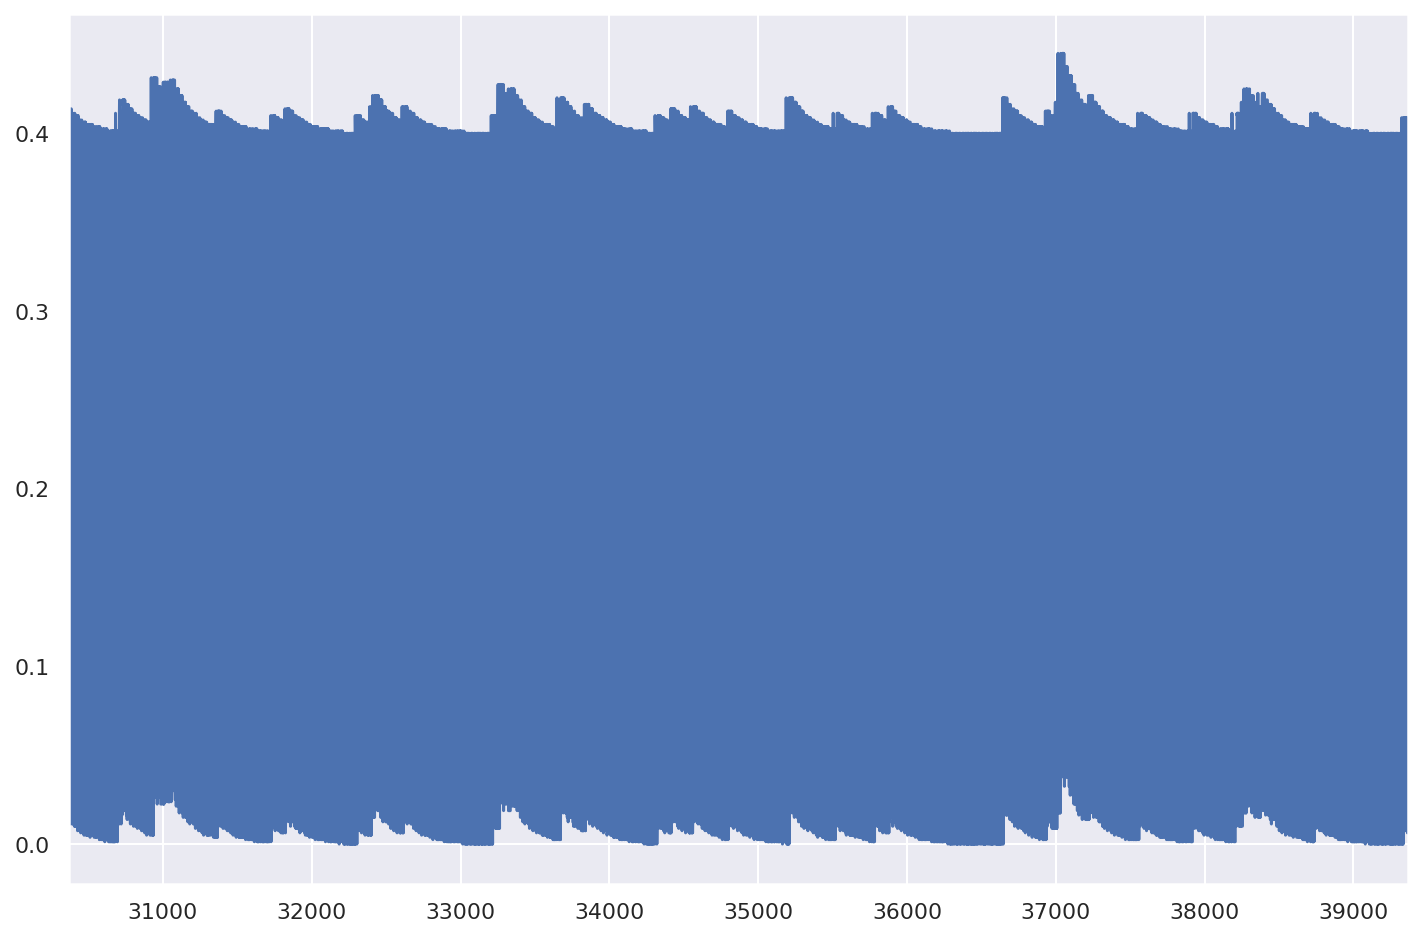

In [57]:
df1.loc[30366:39366]['load_1min'].plot(figsize=(12,8))

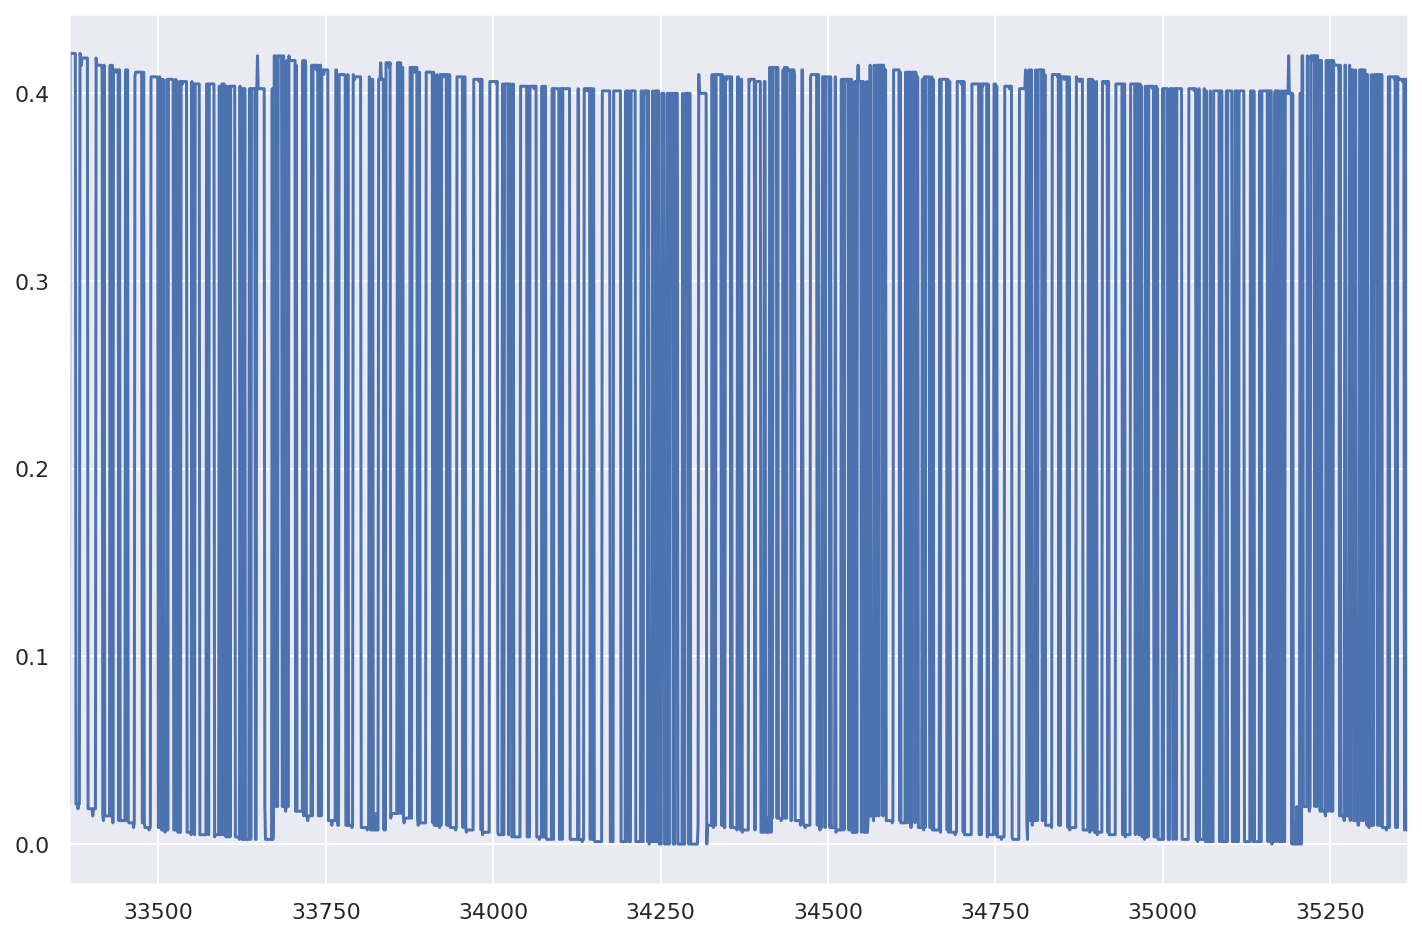

In [58]:
df1.loc[33366:35366]['load_1min'].plot(figsize=(12,8))

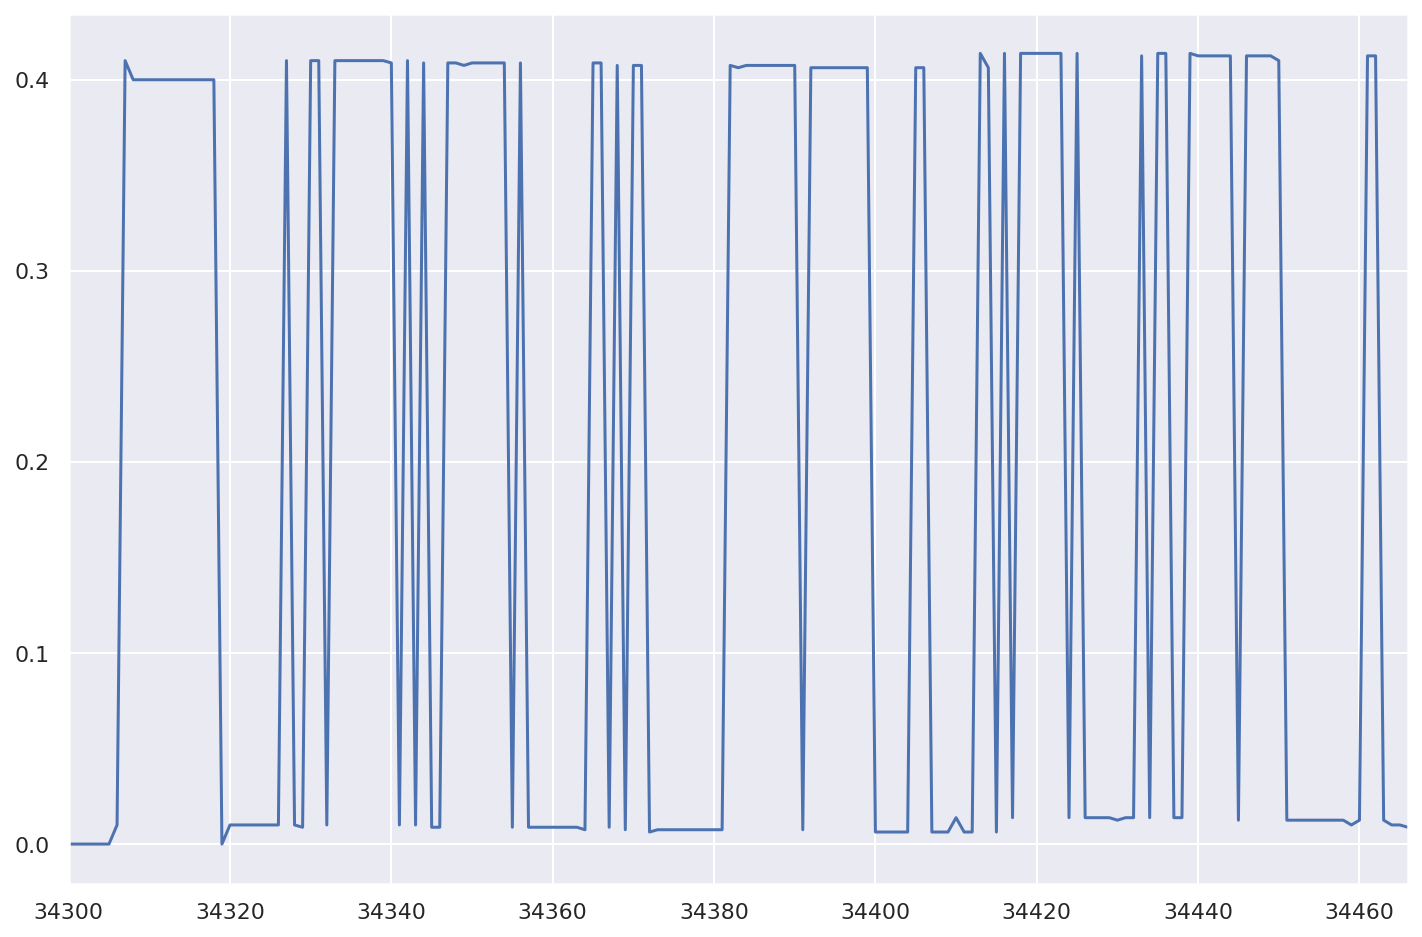

In [59]:
df1.loc[34300:34466]['load_1min'].plot(figsize=(12,8))

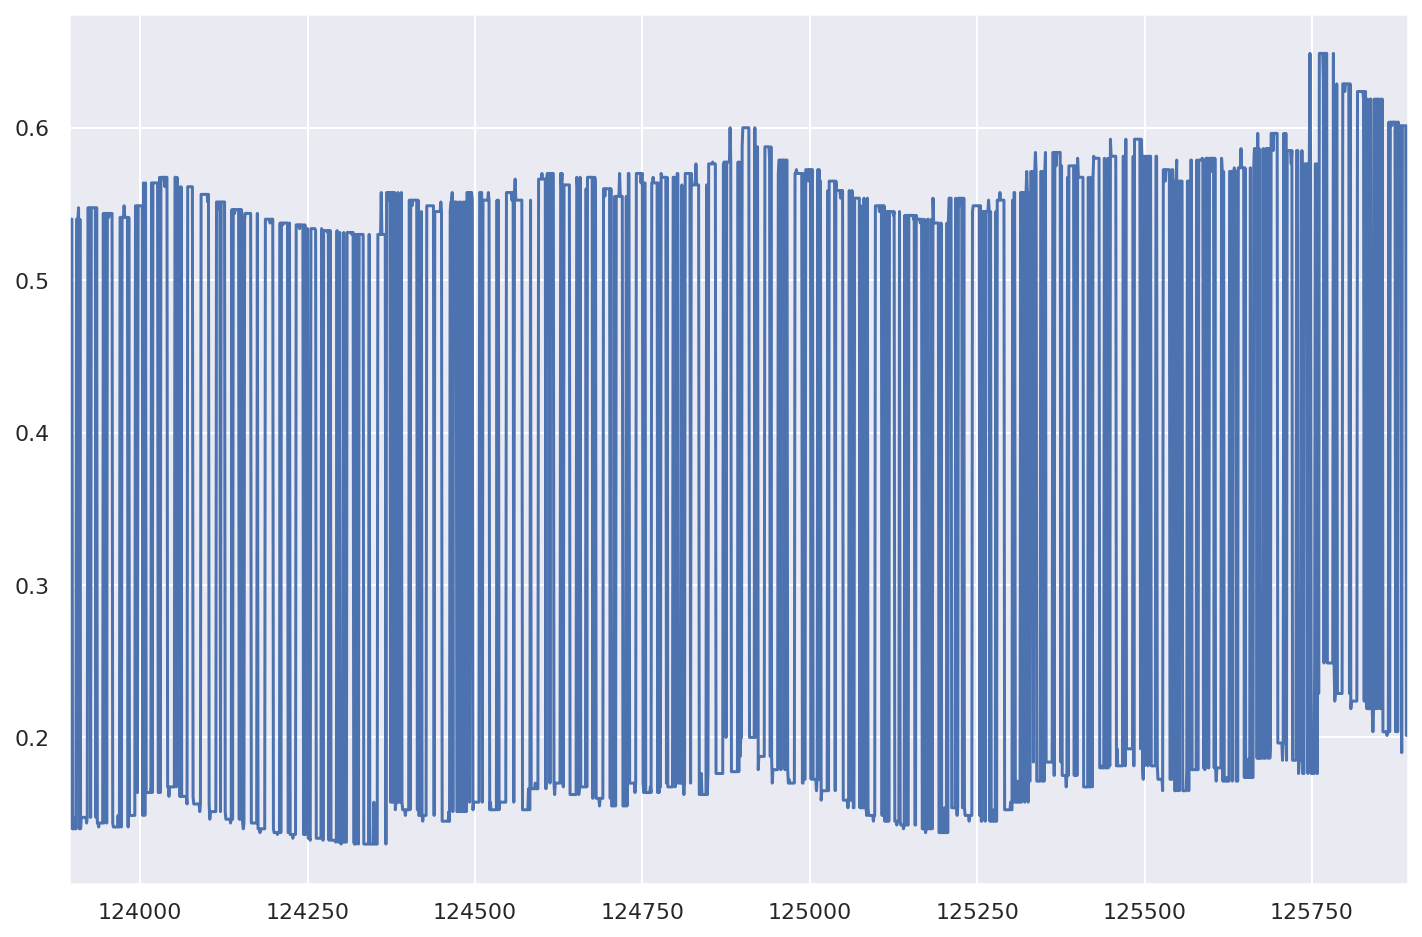

In [48]:
df1.loc[123893:125893]['load_1min'].plot(figsize=(12,8))

In [38]:
top_discords

array([ 68745, 100641,  34366, 124893, 111594])

# Top motifs

In [5]:
'''
top_motifs = {}

for label, window_size in windows:
    column_label = '{} Profile'.format(label)
    column_idx_label = '{} Profile Index'.format(label)
    mp = df[column_label].dropna().values
    mpi = df[column_idx_label].dropna().values
    ts = df['passenger_count'].values
    top_motifs[label] = motifs(ts, (mp, mpi), max_motifs=3, ex_zone=window_size/2, n_neighbors=5)
    
    ax = df.plot(kind='line', y=column_label, figsize=(15, 7), title=label)
    for indices, color in zip(top_motifs[label][0], ['red', 'green', 'yellow']):
        for start_index in indices:
            df.iloc[start_index:start_index+window_size][column_label].plot(kind='line', c=color)
    
    plt.show()
'''

"\ntop_motifs = {}\n\nfor label, window_size in windows:\n    column_label = '{} Profile'.format(label)\n    column_idx_label = '{} Profile Index'.format(label)\n    mp = df[column_label].dropna().values\n    mpi = df[column_idx_label].dropna().values\n    ts = df['passenger_count'].values\n    top_motifs[label] = motifs(ts, (mp, mpi), max_motifs=3, ex_zone=window_size/2, n_neighbors=5)\n    \n    ax = df.plot(kind='line', y=column_label, figsize=(15, 7), title=label)\n    for indices, color in zip(top_motifs[label][0], ['red', 'green', 'yellow']):\n        for start_index in indices:\n            df.iloc[start_index:start_index+window_size][column_label].plot(kind='line', c=color)\n    \n    plt.show()\n"

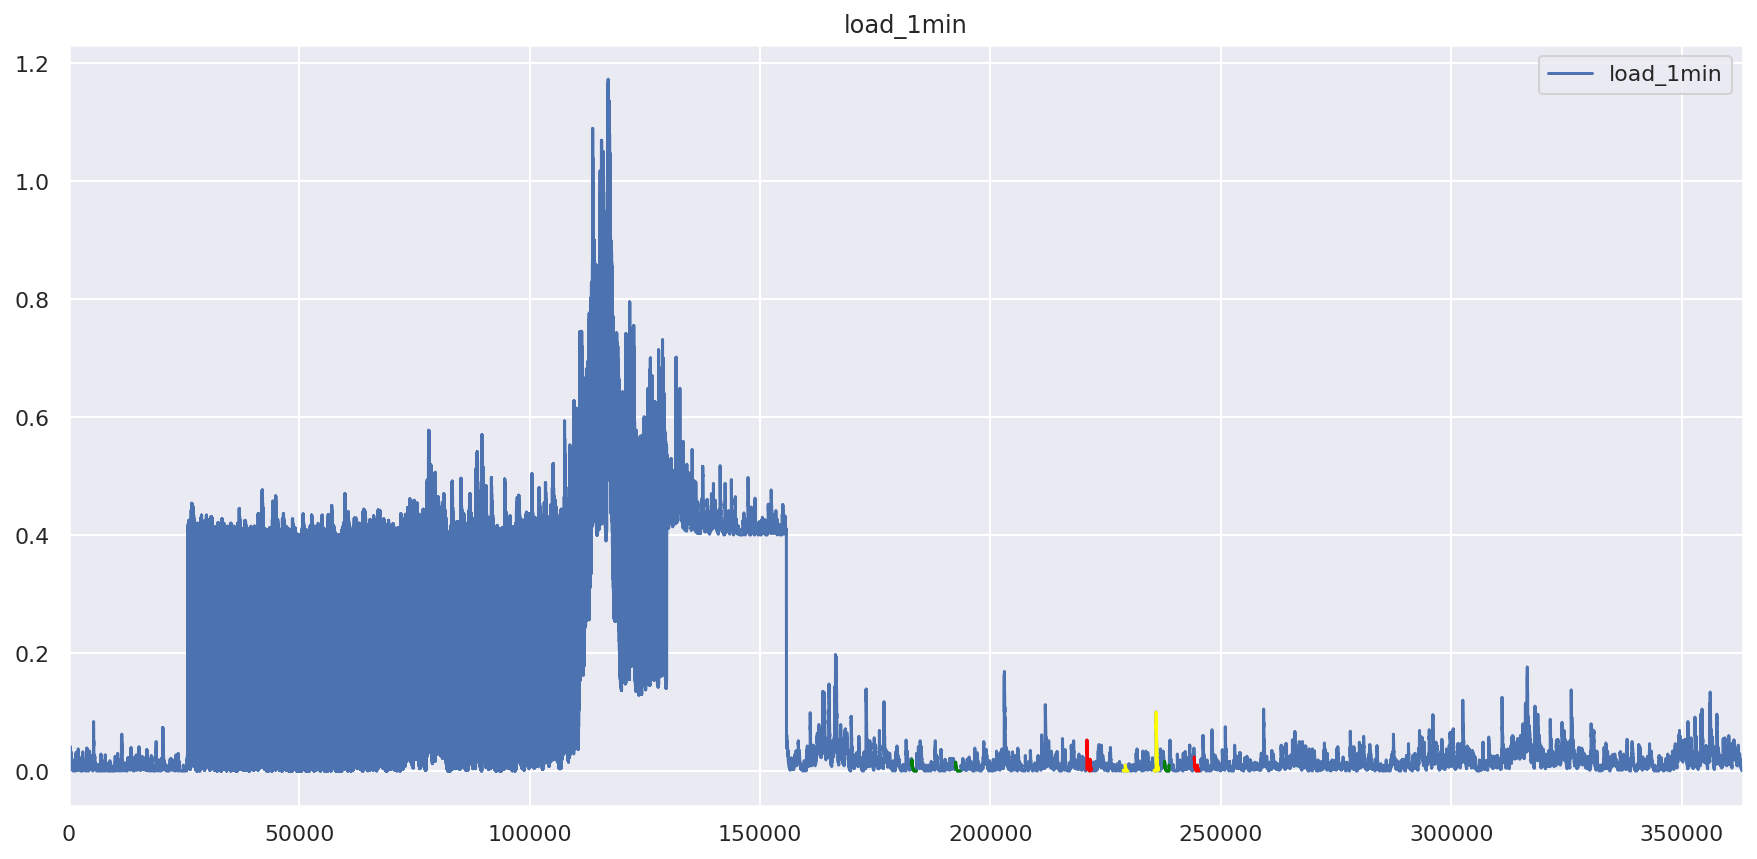

In [36]:
mp = mp.dropna().values
mpi = mpi.dropna().values
ts = df1['load_1min'].values
top_motifs = motifs(ts, (mp, mpi), max_motifs=3, ex_zone=window_size/2, n_neighbors=5)
ax = df1.plot(kind='line', y='load_1min', figsize=(15, 7), title='load_1min')

for indices, color in zip(top_motifs[0], ['red', 'green', 'yellow']):
    for start_index in indices:
        df1.iloc[start_index:start_index+window_size]['load_1min'].plot(kind='line', c=color)
plt.show()

# Numenta Example Plot

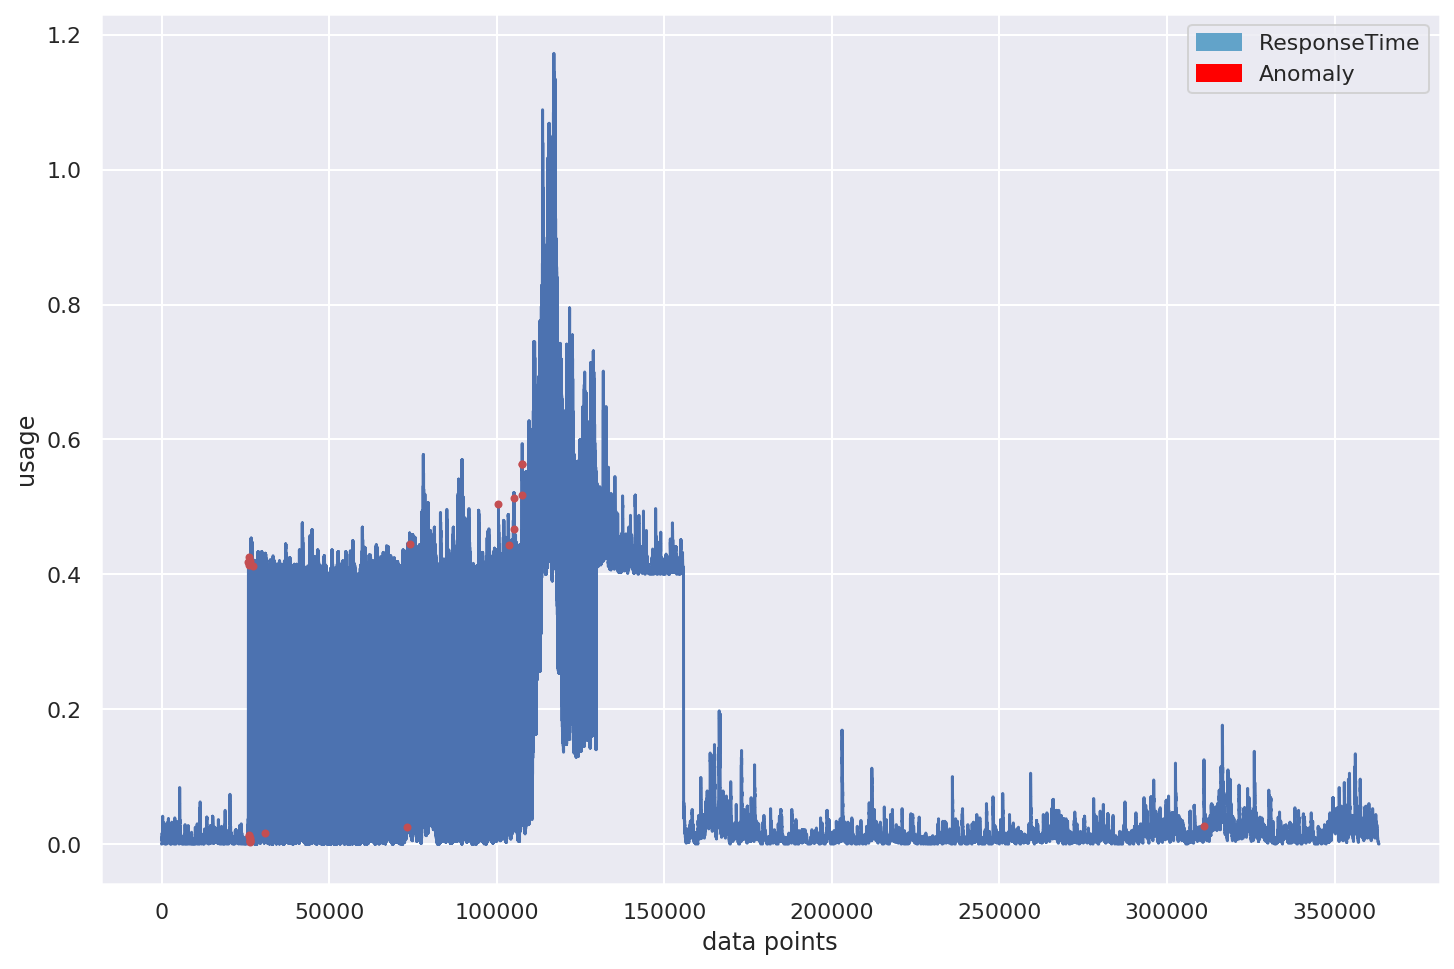

In [14]:
plt.figure(figsize = (12,8))
plt.plot(non_anom, linestyle = '-', label ='ResponseTime')
plt.plot(anom, 'ro', markersize = "3", label ='Anomaly')

red_patch = mpatches.Patch(color='red', label='Anomaly')
blue_lines = mpatches.Patch(color='#62A3C9', label='ResponseTime')

plt.legend(handles=[blue_lines, red_patch])
plt.ylabel('usage')
plt.xlabel('data points')
plt.show()

# More Insights